<a href="https://www.kaggle.com/code/erhanalasar/telco-customer-churn-prediction?scriptVersionId=194421271" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

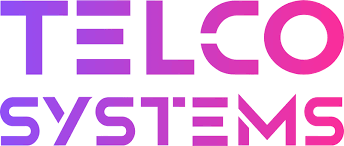

<div class="inner_cell" style="text-align:center;">
  <div class="text_cell_render border-box-sizing rendered_html">
    <p></p>
    <div class="list-group" id="list-tab" role="tablist" style="display:inline-block; text-align:left;">
      <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style="border:2px solid #FF780F;background-color:#FF780F; color:white; font-family:Verdana;text-align: center; font-size:140%;font-weight: Bold;">Notebook Content</h3>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Business Problem</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Dataset Story</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Exploratory Data Analysis (EDA)</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Base Model Setup</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Feature Engineering</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="services" target="_self" 
style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">One-Hot Encoding</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab" aria-controls="services" target="_self"  
style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Model</a>
       <a class="list-group-item list-group-item-action" data-toggle="list" href="#9" role="tab" aria-controls="services" target="_self"    
   </div>
  </div>
</div>


<h1 style="color:#FF780F;">Business Problem:</h1>

<h5 style = "color:#000000;"> You are asked to develop a machine learning model that can predict customers who will leave the company..</h5>

<h1 style="color:#FF780F;">Dataset Story:</h1>
<h5 style="color:#000000;">CustomerID : ID of the customer</h5>
<h5 style="color:#000000;">Gender : Sex of the customer</h5>
<h5 style="color:#000000;">Partner : Whether the customer has a partner or not (Yes, No)</h5>
<h5 style="color:#000000;">Dependents : Whether the customer has dependents (Yes, No)</h5>
<h5 style="color:#000000;">tenure : The number of months customer stays in the company </h5>
<h5 style="color:#000000;">PhoneService : Whether the customer has phone service (Yes, No)</h5>
<h5 style="color:#000000;">MultipleLines : Whether the customer has more than one line (Yes, No, No phone service)</h5>
<h5 style="color:#000000;">InternetService : Customer's internet service provider (DSL, Fiber optic, No)</h5>
<h5 style="color:#000000;">OnlineSecurity : Whether the customer has online security (Yes, No, No Internet service)</h5>
<h5 style="color:#000000;">OnlineBackup : Whether the customer has online backup (Yes, No, No Internet service)</h5>
<h5 style="color:#000000;">DeviceProtection : Whether the customer has device protection (Yes, No, No Internet service)</h5>
<h5 style="color:#000000;">TechSupport : Whether the customer receives technical support (Yes, No, No Internet service)</h5>
<h5 style="color:#000000;">StreamingTV : Indicates whether the customer has streaming TV (Yes, No, No Internet service) Indicates whether the customer uses the Internet service to stream television programs from a third-party provider</h5>
<h5 style="color:#000000;">StreamingMovies : Whether the customer has streaming movies (Yes, No, No Internet service) Indicates whether the customer is using the Internet service to stream movies from a third-party provider</h5>
<h5 style="color:#000000;">Contract : Duration of the customer's contract (Month to month, One year, Two years)</h5>
<h5 style="color:#000000;">PaperlessBilling : Whether the customer has a paperless bill (Yes, No)</h5>
<h5 style="color:#000000;">PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))</h5>
<h5 style="color:#000000;">MonthlyCharges : Amount charged to the customer monthly</h5>
<h5 style="color:#000000;">TotalCharges : Total amount charged to the customer</h5>
<h5 style="color:#000000;">Churn : Whether the customer is using or not (Yes or No) - Customers who left in the last month or quarter</h5>

<h1 style="color:#FF780F;">Explaratory Data Analysis (EDA):</h1>

# Importings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings

warnings.simplefilter(action="ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 170)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/telcochurn/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


# Overview & Preprocessing

In [3]:
# Step 1: Examine the general picture.
def check_df(dataframe, head=5, tail=5, quan=False):
    print('########## Shape ##########')
    print(dataframe.shape)
    print('########## Types ##########')
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print('########## Head ##########')
    print(dataframe.head(head))
    print('########## Tail ##########')
    print(dataframe.tail(tail))
    print('########## NA ##########')
    print(dataframe.isnull().sum())
    if quan:
        print('########## Quantiles ##########')
        print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

########## Shape ##########
(7043, 21)
########## Types ##########
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### Duplicated Values #####################
0
########## Head ##########
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0  7590-VHVEG  Female              0     Yes         No       1      

In [5]:
# Total charges datatype is object. There are ' ' values. Make them NaN and convert it to float and typecast Churn to 0 and 1's
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [6]:
# Step 2: Capture numerical and categorical variables.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [8]:
cat_cols, num_cols, cat_but_car

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'SeniorCitizen',
  'Churn'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['customerID'])

In [9]:
# Step 3: Analyze the numerical and categorical variables.
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            
            # TARGET_COUNT
            sns.countplot(x=col_name, data=dataframe, ax=ax1)
            ax1.set_title(f"Frequency of {col_name}")
            ax1.set_ylabel("TARGET_COUNT")
            ax1.tick_params(axis="x", rotation=45)
            
            # RATIO
            values = dataframe[col_name].value_counts()
            ax2.pie(x=values, labels=values.index, autopct="%1.1f%%", startangle=90)
            ax2.set_title(f"RATIO by {col_name}")
            ax2.legend(labels=[f"{index} - {value/sum(values)*100:.2f}%" for index, value in zip(values.index, values)],
                    loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            
            plt.tight_layout()
            plt.show()

    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            
            # TARGET_COUNT
            sns.countplot(x=col_name, data=dataframe, ax=ax1)
            ax1.set_title(f"Frequency of {col_name}")
            ax1.set_ylabel("TARGET_COUNT")
            ax1.tick_params(axis="x", rotation=45)
            
            # RATIO
            values = dataframe[col_name].value_counts()
            ax2.pie(x=values, labels=values.index, autopct="%1.1f%%", startangle=90)
            ax2.set_title(f"RATIO by {col_name}")
            ax2.legend(labels=[f"{index} - {value/sum(values)*100:.2f}%" for index, value in zip(values.index, values)],
                    loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            
            plt.tight_layout()
            plt.show()

def num_summary(dataframe, numerical_col, plot=False, hist_bins=20):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(numerical_col)
    print("##########################################")
    print(dataframe[numerical_col].describe(quantiles).T)
    print("##########################################")

    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram
        plt.subplot(2, 2, 1)
        dataframe[numerical_col].hist(bins=hist_bins)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + " Distribution")
        
        # Boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)
        
        # Density Plot
        plt.subplot(2, 2, 3)
        sns.kdeplot(dataframe[numerical_col], fill=True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + " KDE")
        
        # QQ Plot
        plt.subplot(2, 2, 4)
        stats.probplot(dataframe[numerical_col], dist="norm", plot=plt)
        plt.title(numerical_col + " QQ Plot")
        
        plt.tight_layout()
        plt.show(block=True)

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################


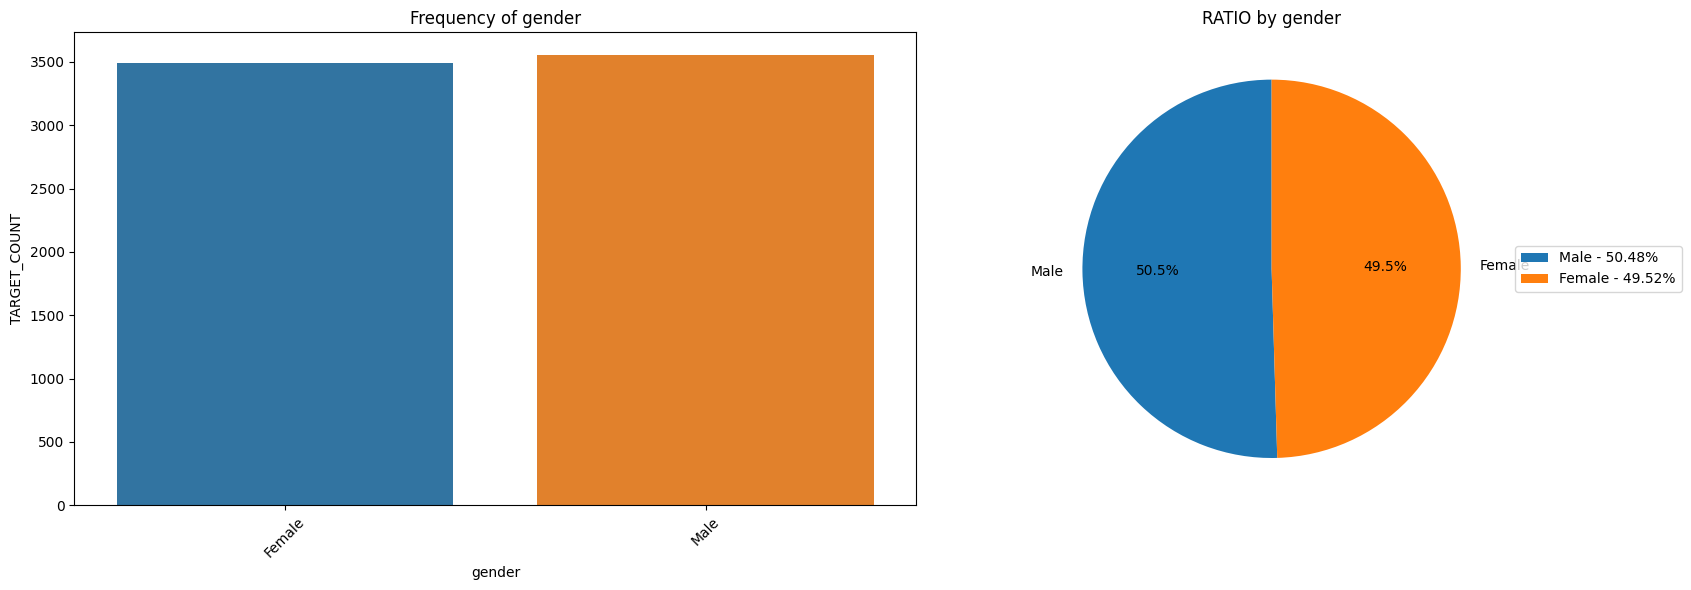

         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
##########################################


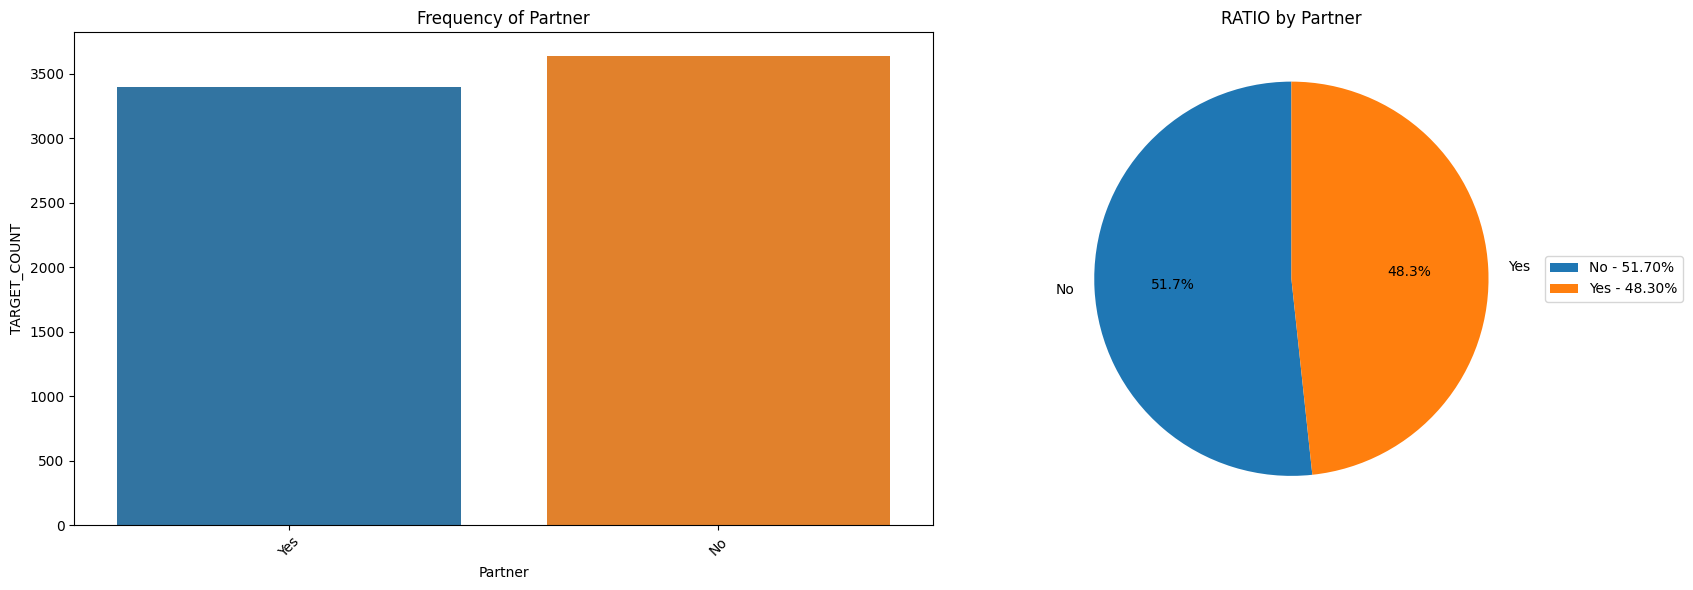

            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
##########################################


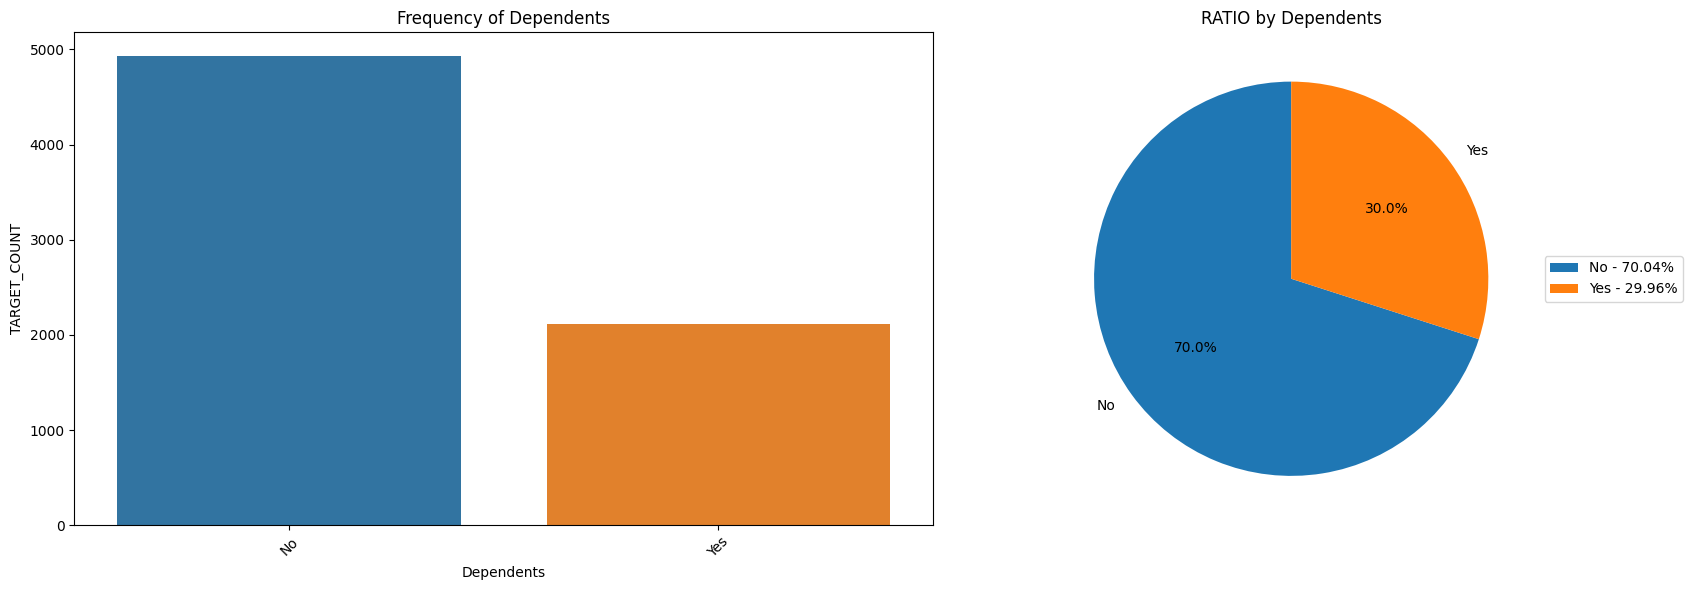

              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
##########################################


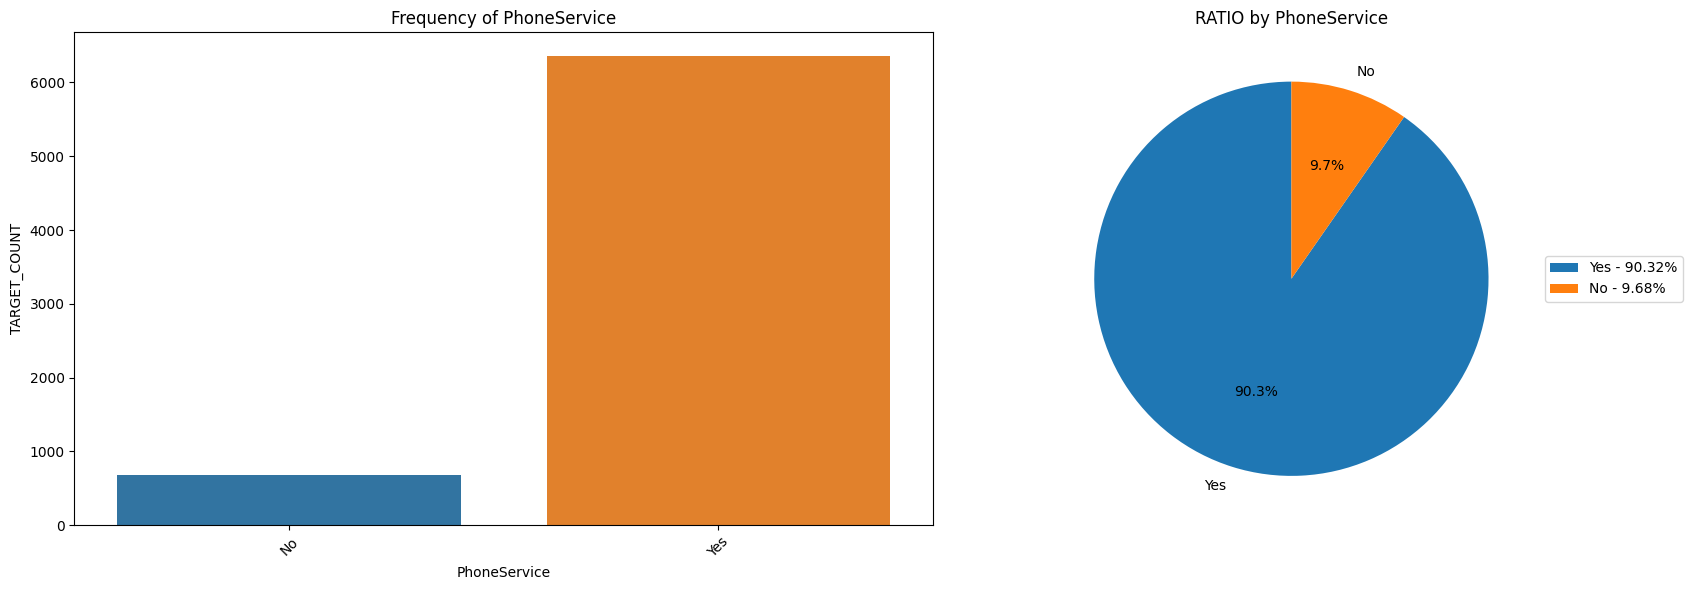

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


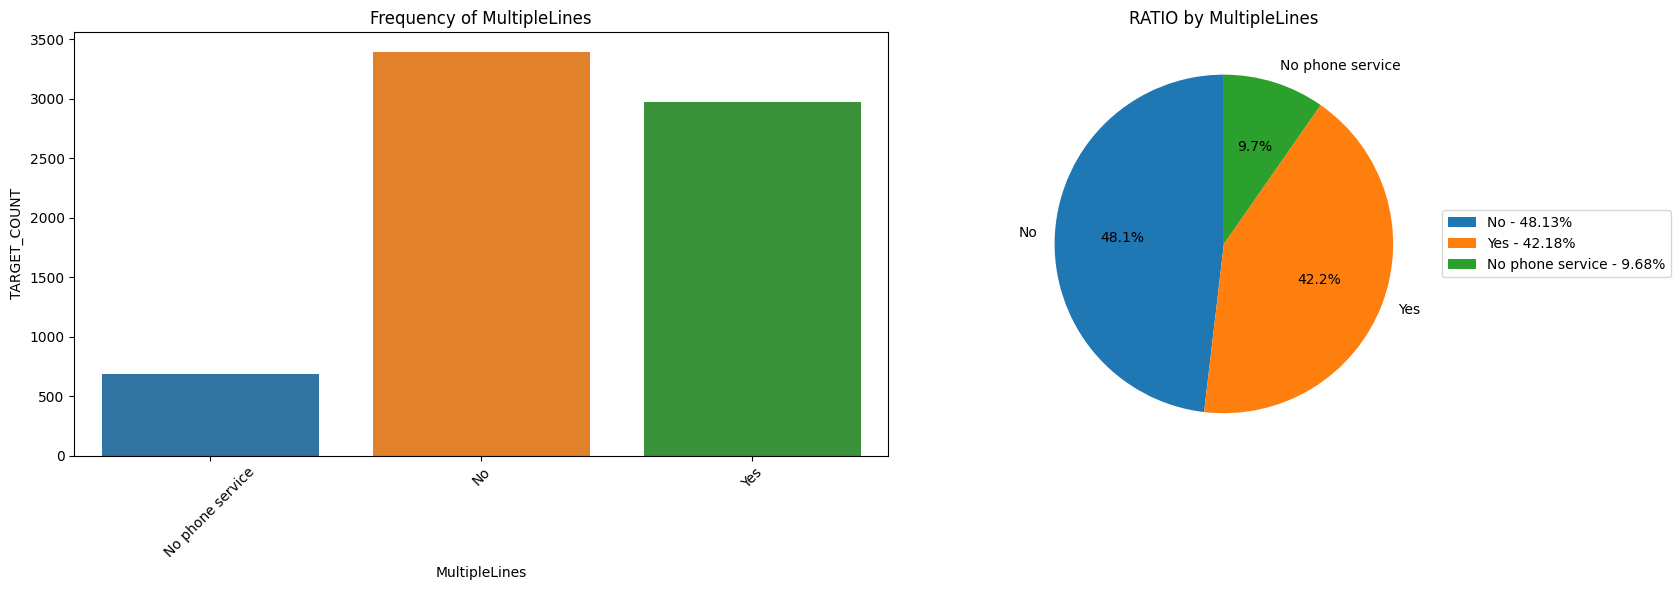

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
##########################################


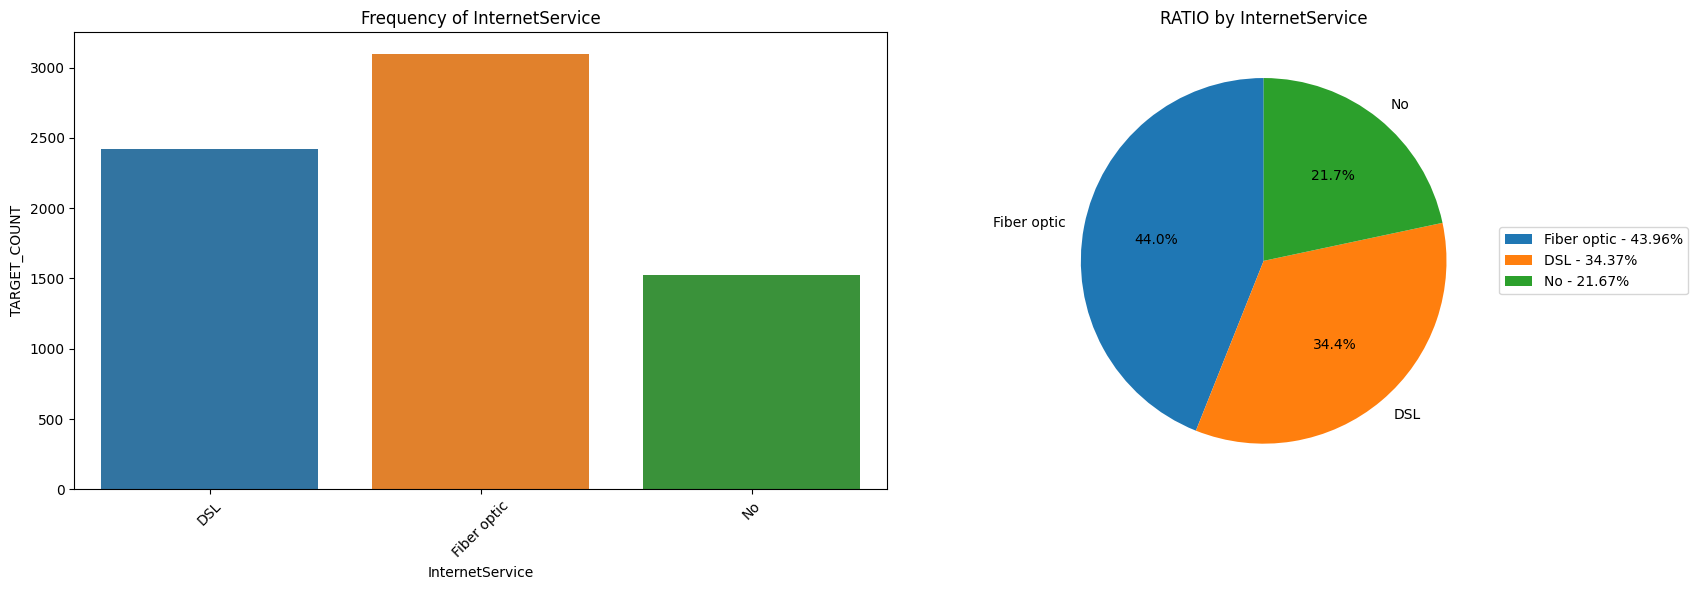

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


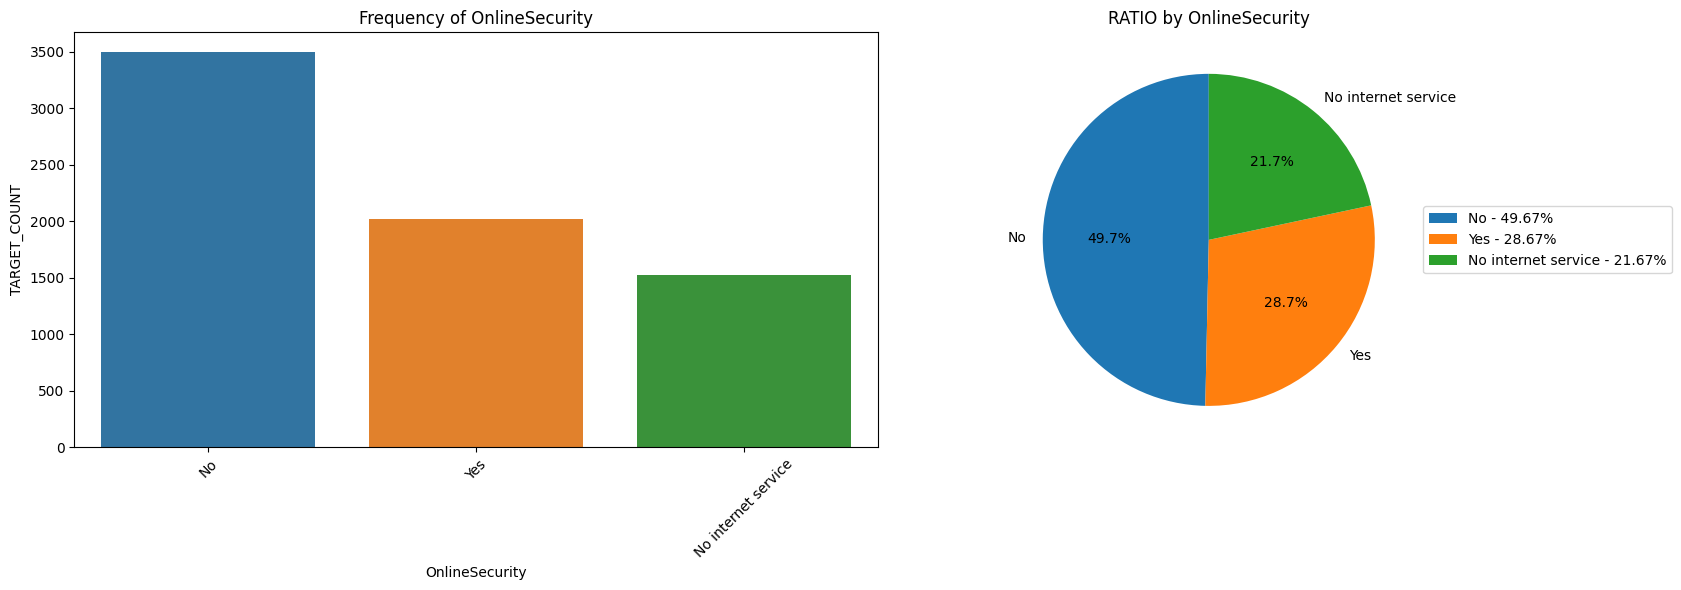

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


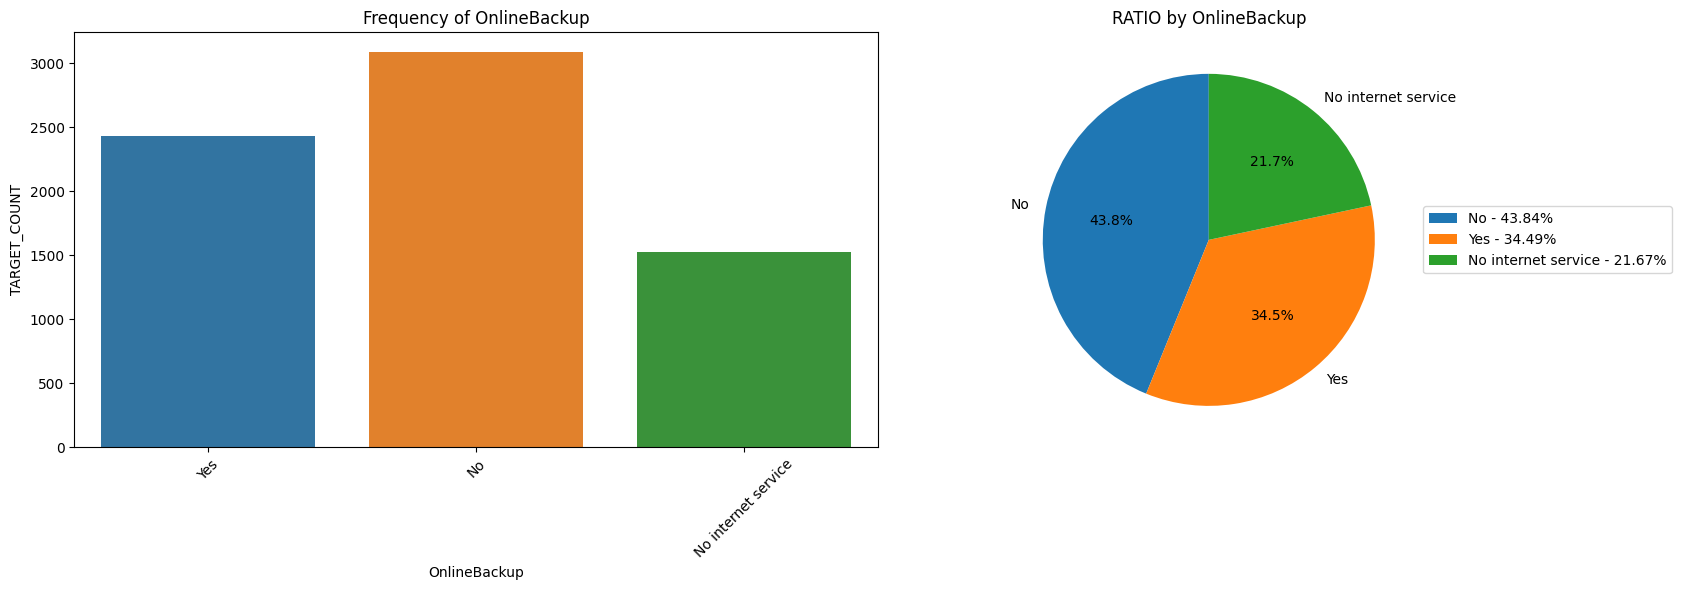

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


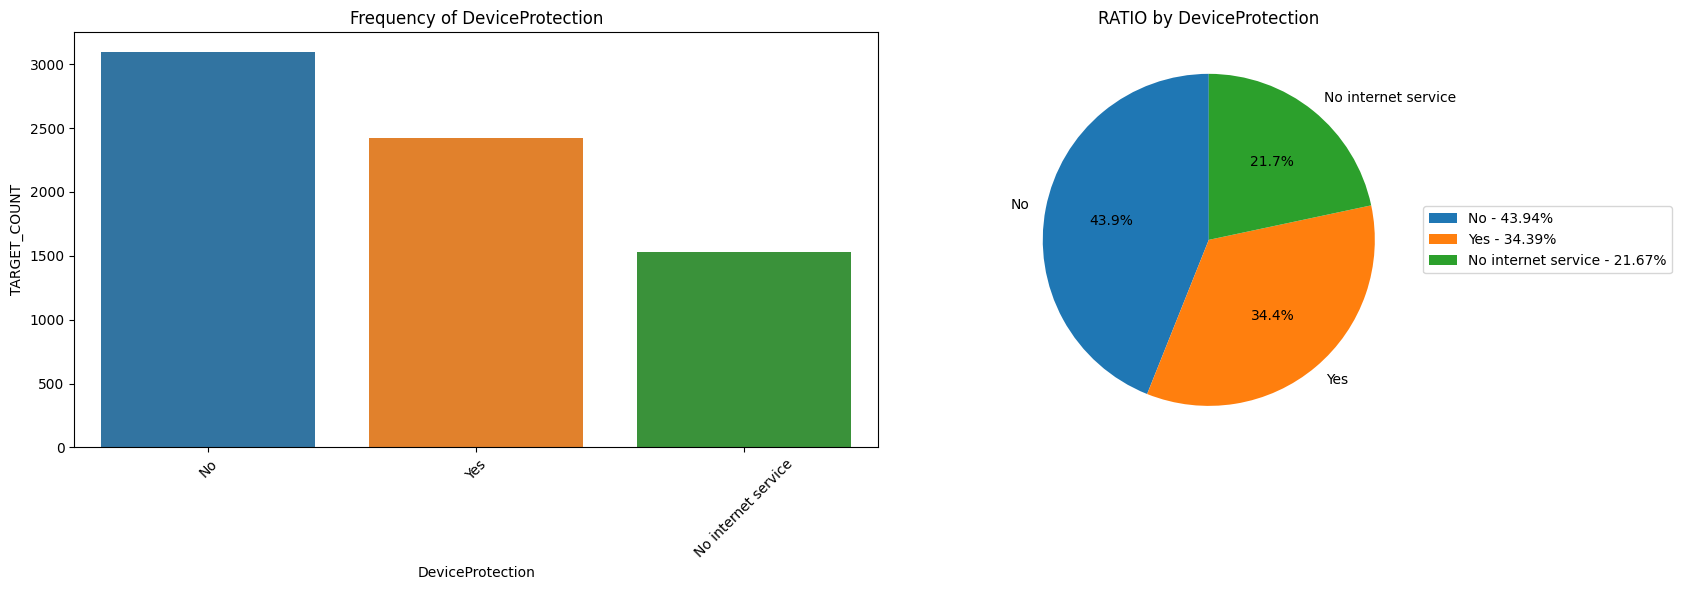

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


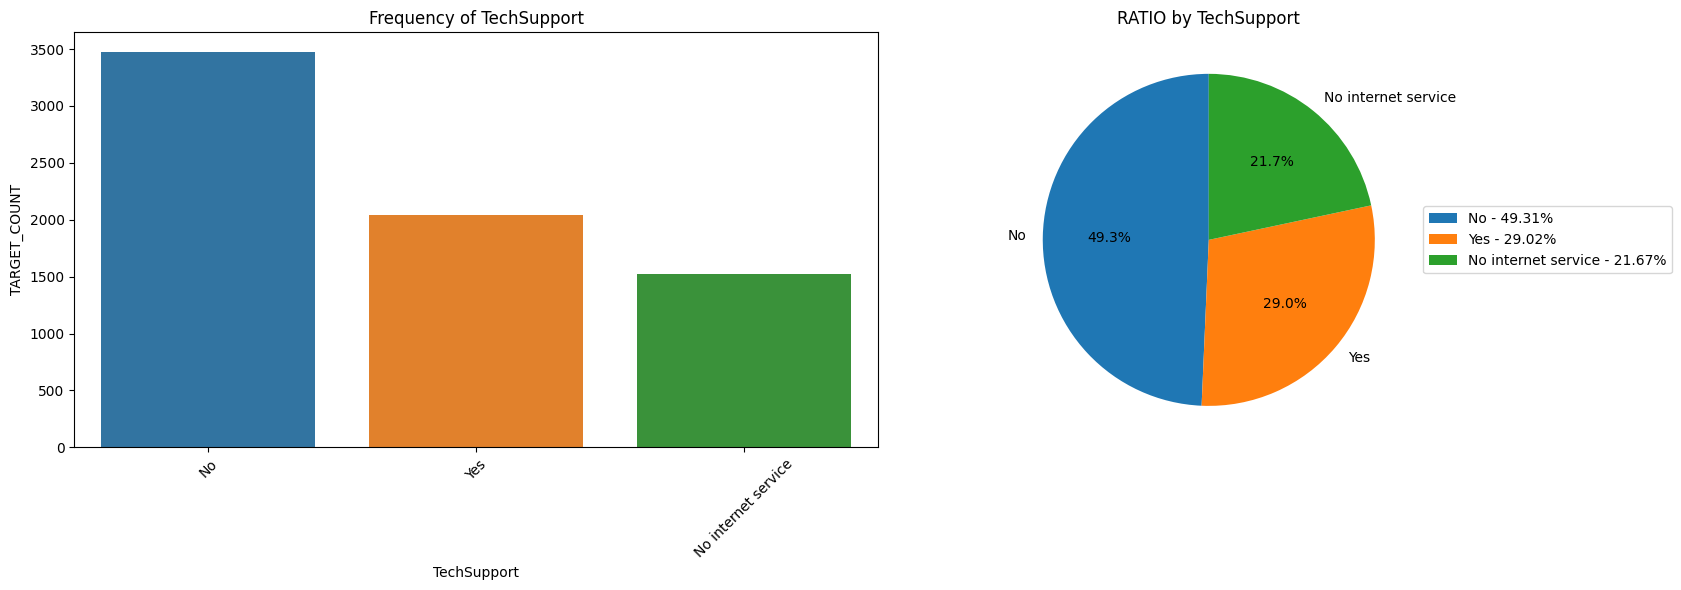

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


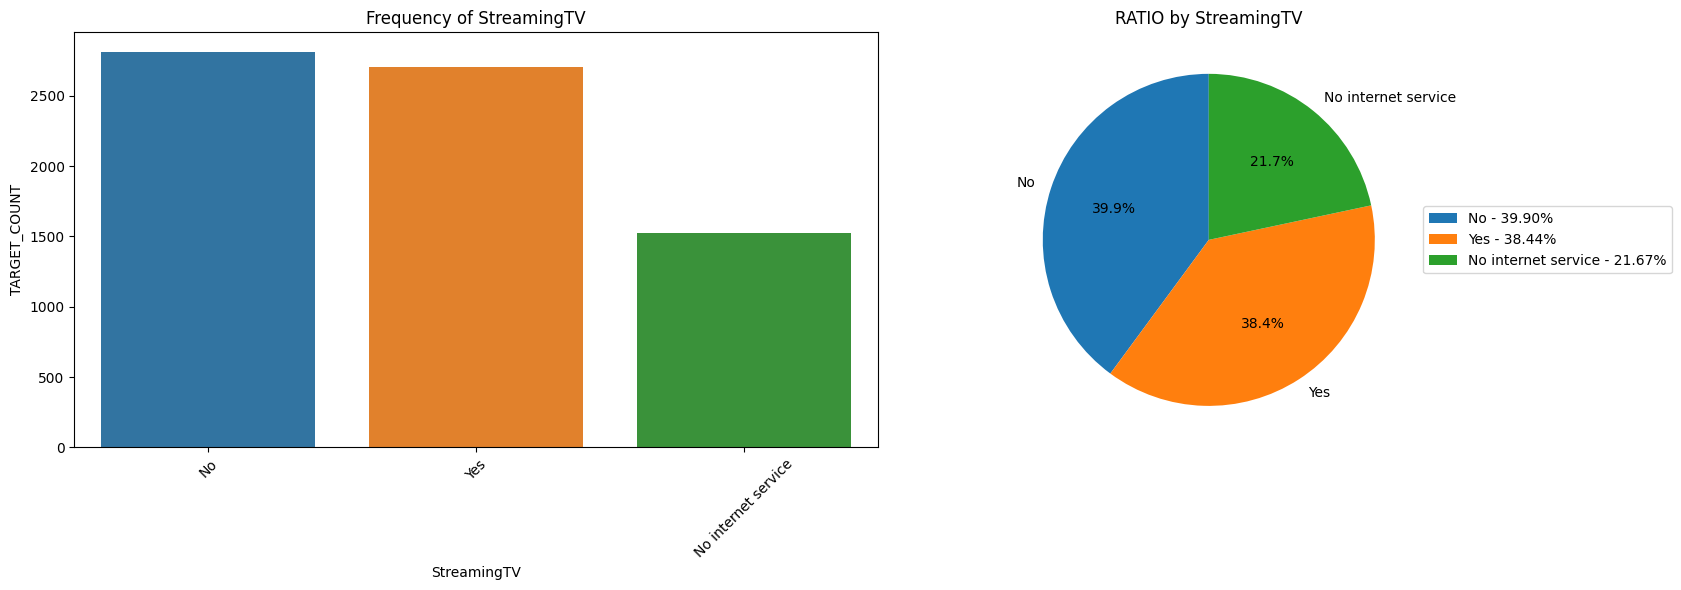

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


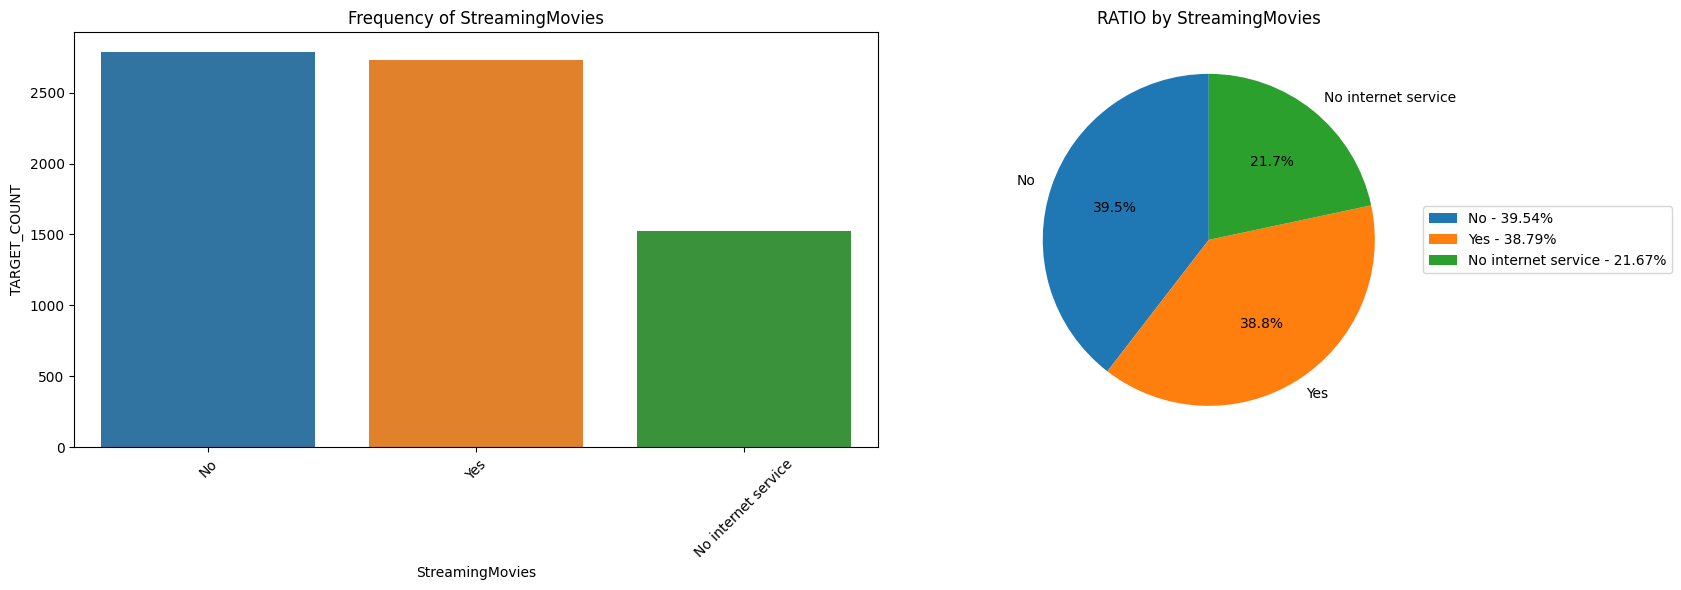

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


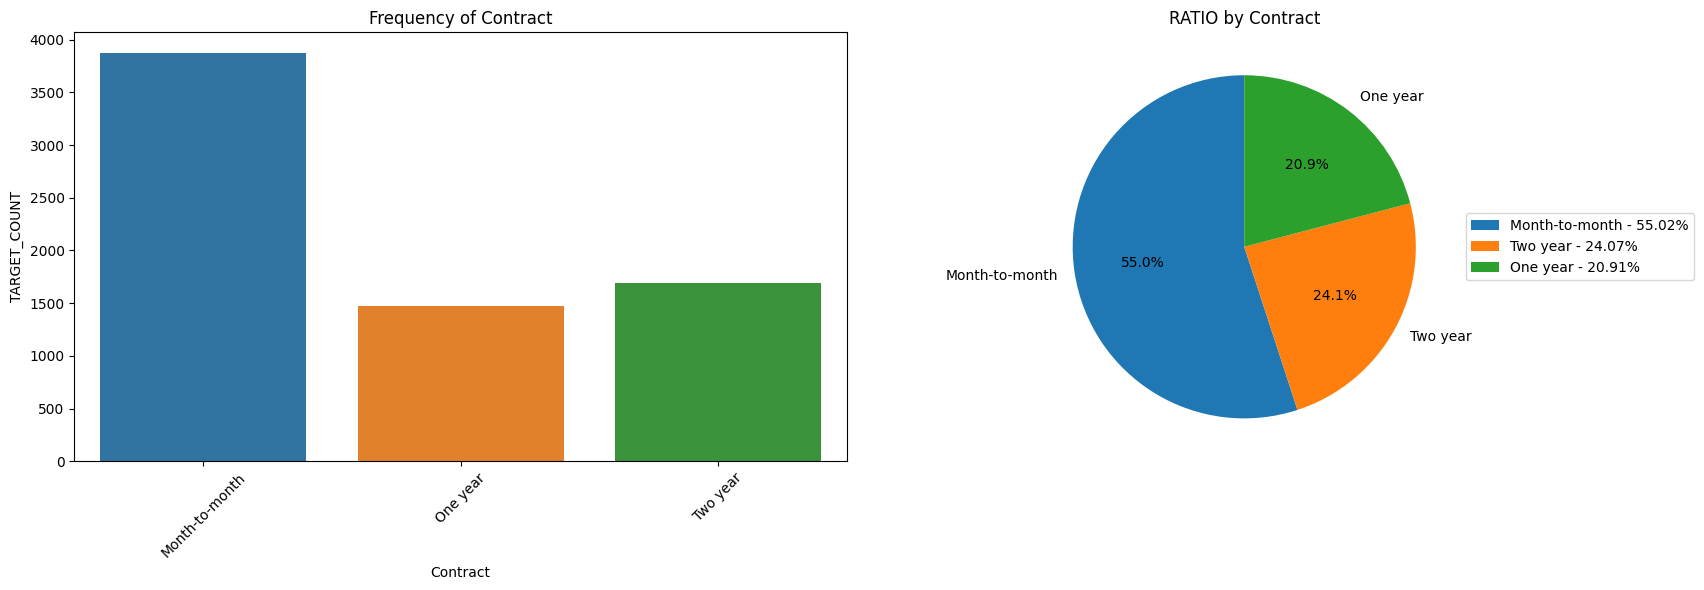

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
##########################################


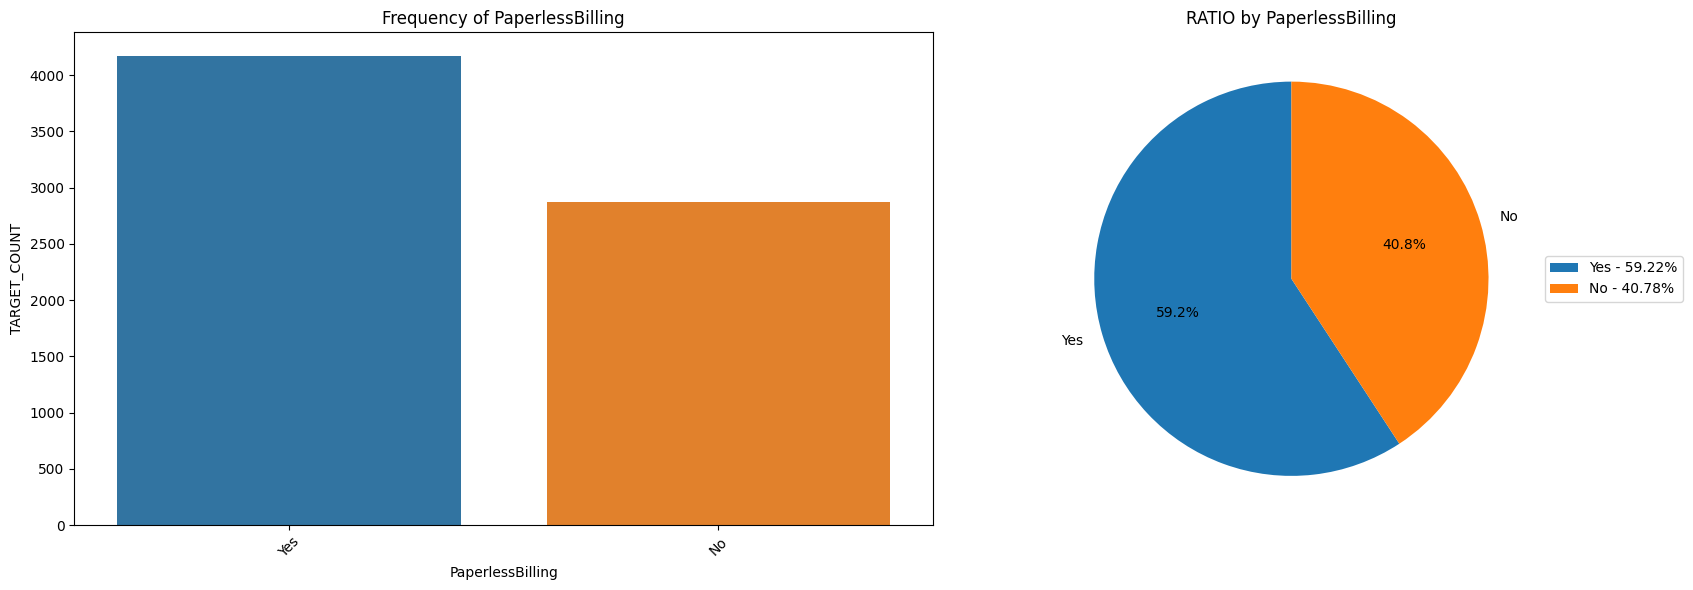

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


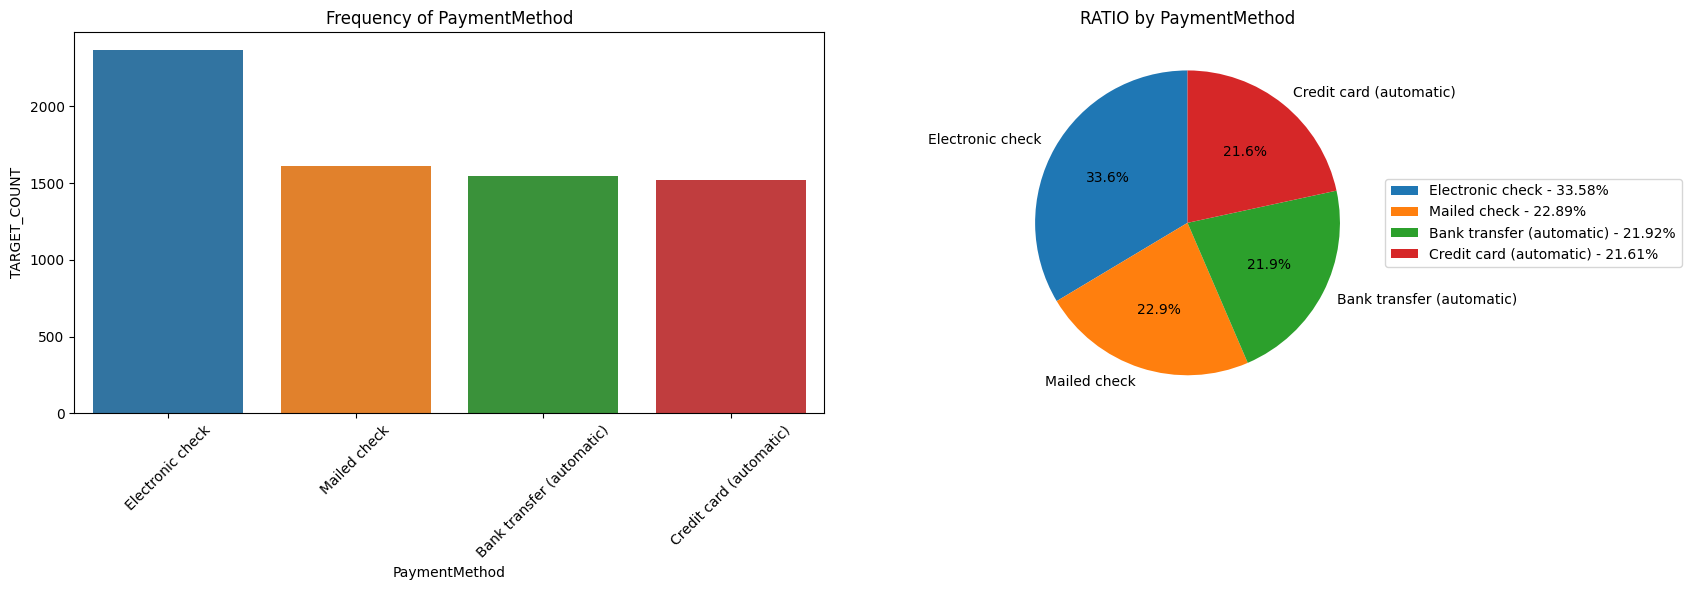

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
##########################################


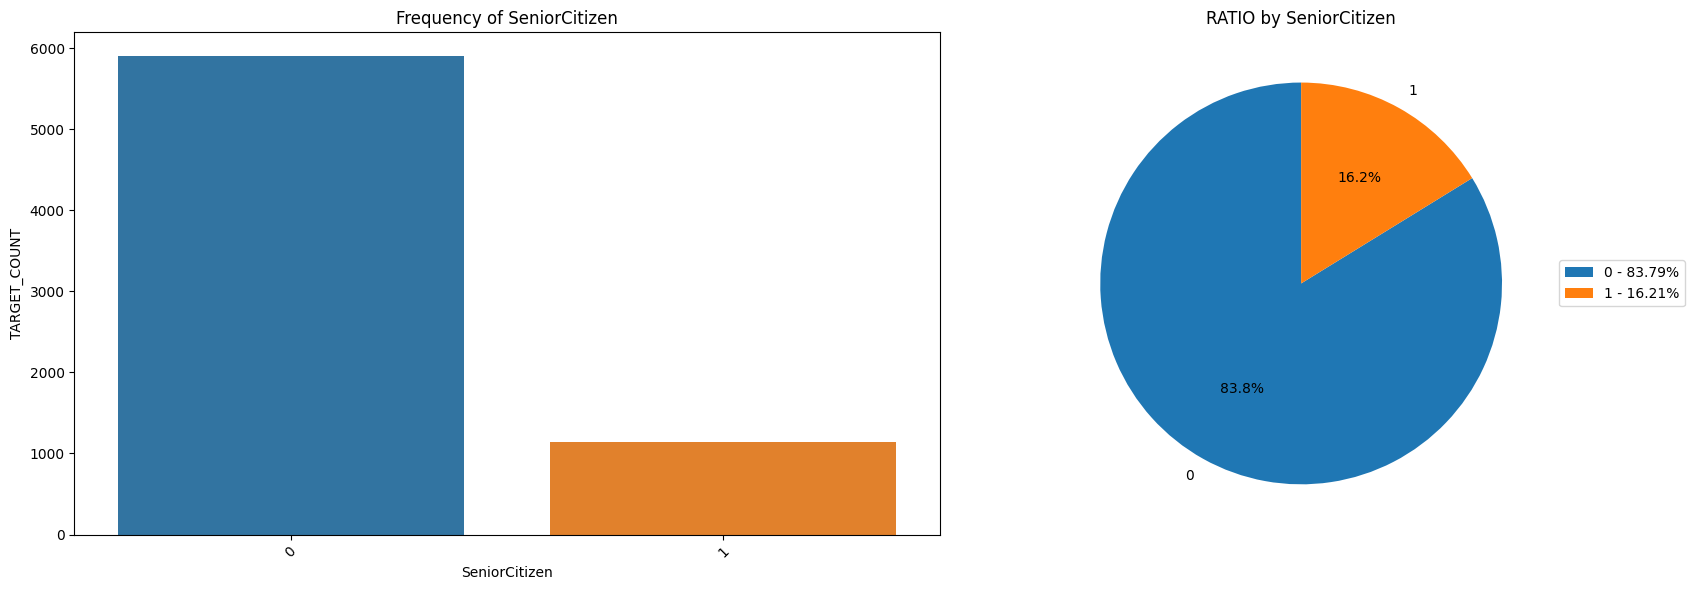

       Churn  Ratio
Churn              
0       5174 73.463
1       1869 26.537
##########################################


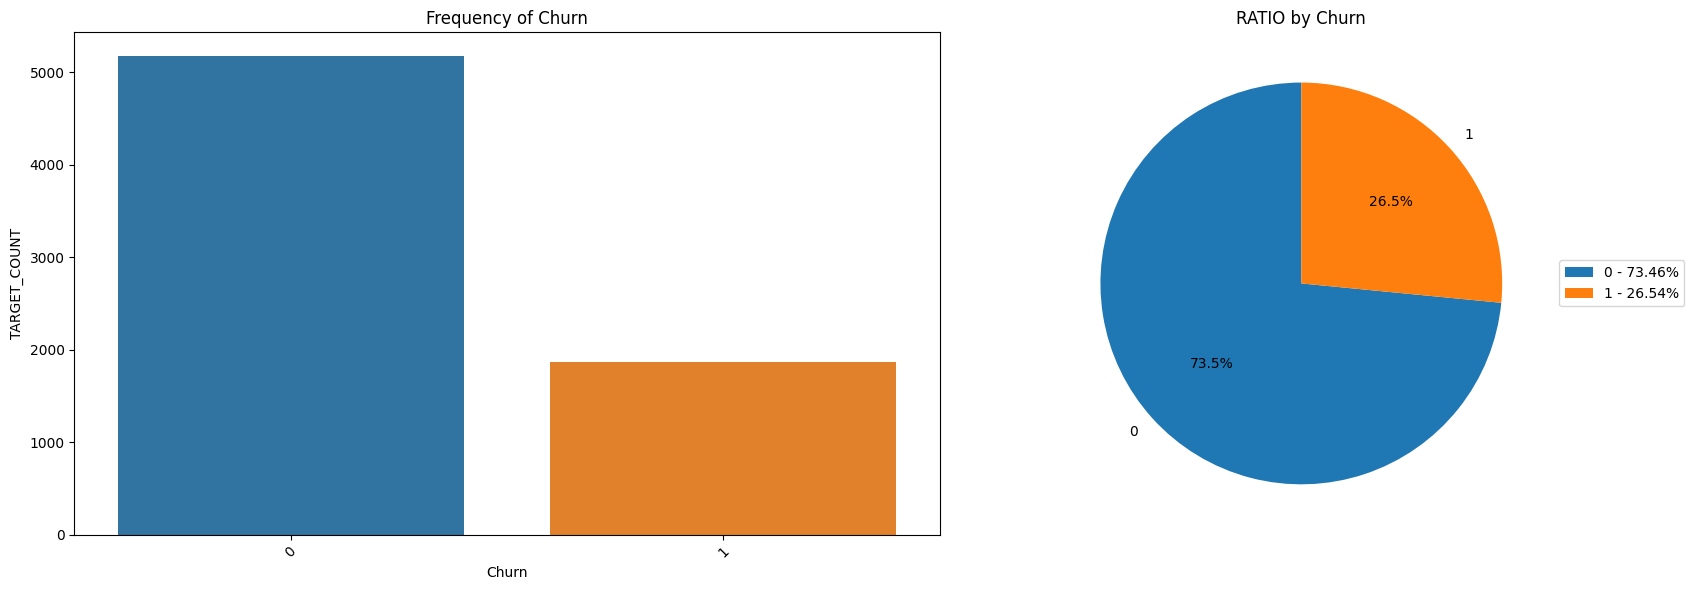

In [10]:
# Analyze categorical cols
for col in cat_cols:
    cat_summary(df, col, plot=True)

tenure
##########################################
count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64
##########################################


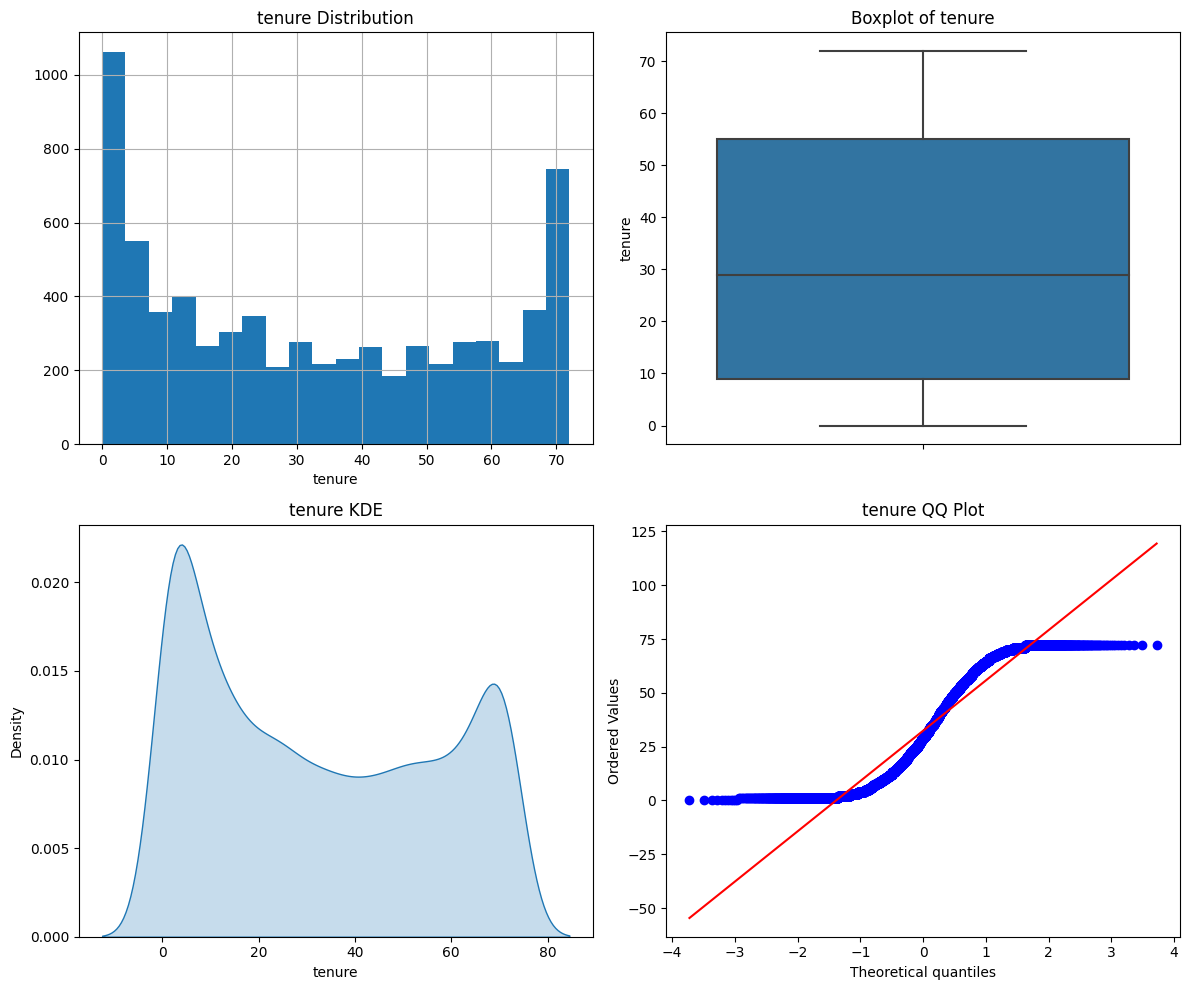

MonthlyCharges
##########################################
count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64
##########################################


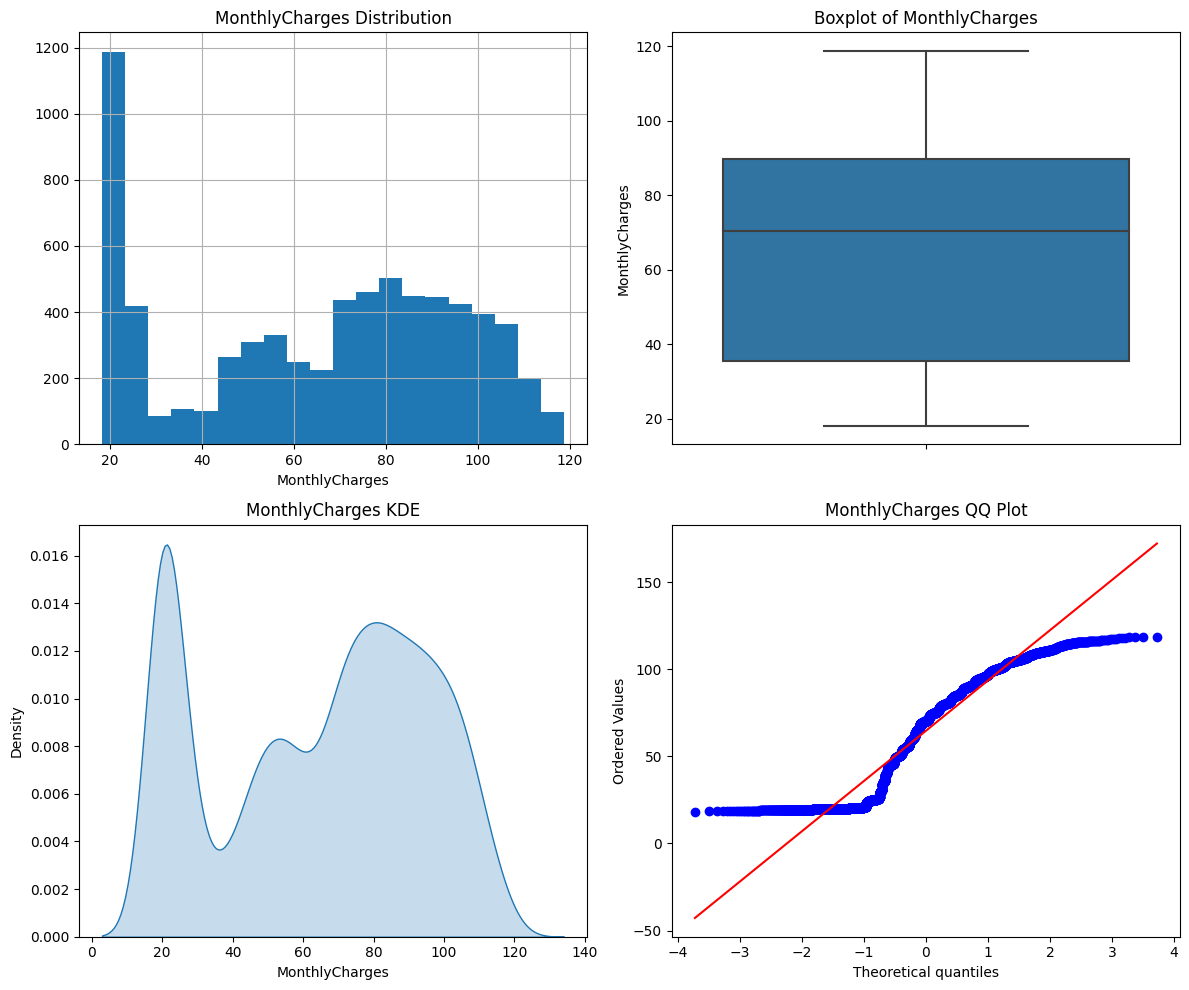

TotalCharges
##########################################
count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64
##########################################


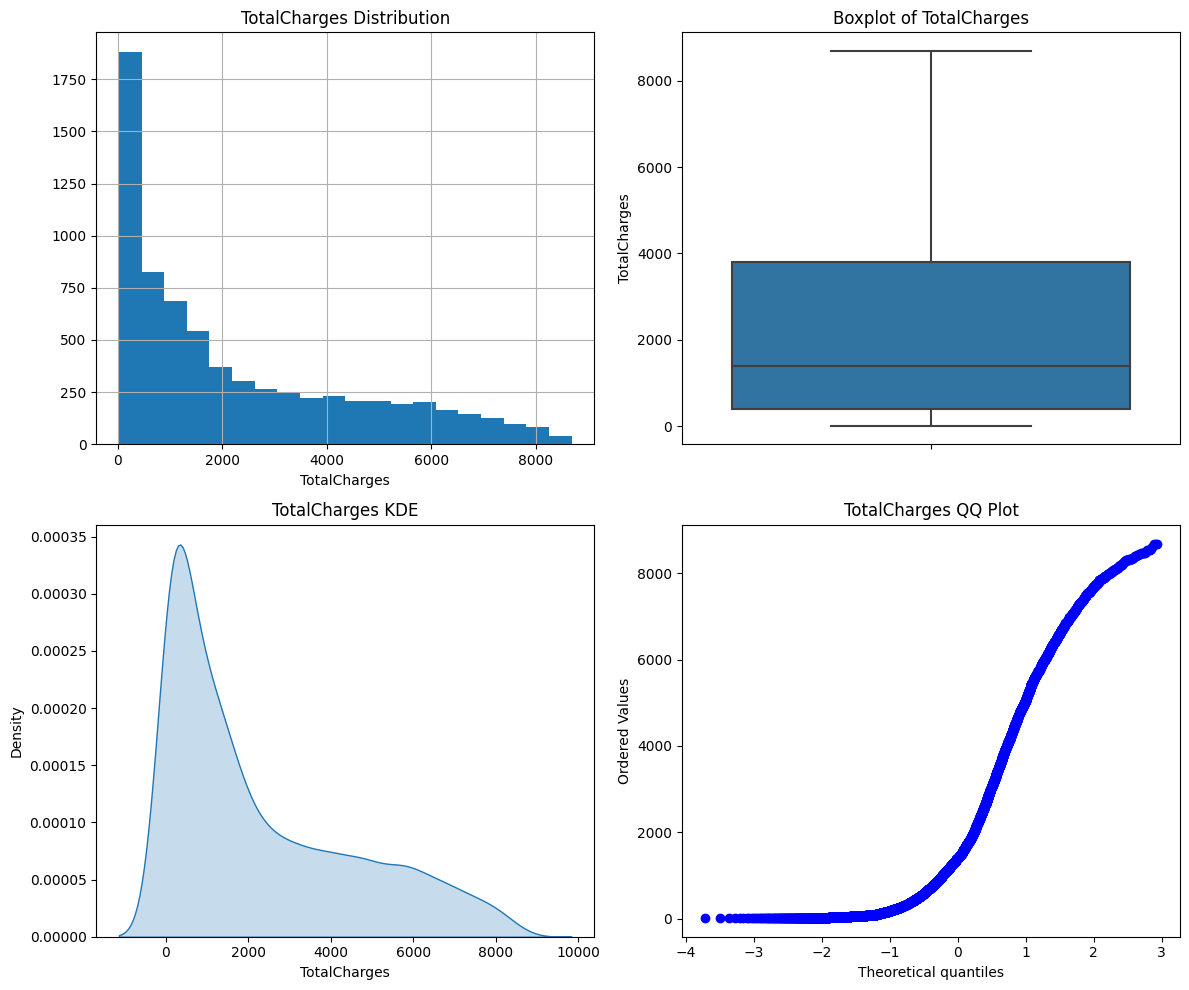

In [11]:
# Analyze numerical cols:
for col in num_cols:
    num_summary(df, col, plot=True)

In [12]:
# Step 4 Analyze the target variable 

# Average of the target variable according to categorical variables,
# Average of the numeric variable according to the target variable

def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    summary = pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                            "TARGET_COUNT": dataframe.groupby(categorical_col)[target].count(),
                            "RATIO": 100 * dataframe[categorical_col].value_counts() / len(dataframe)})
    
    print(summary, end="\n\n\n")
    print("##########################################")

    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 6))
        
        # TARGET_MEAN
        summary["TARGET_MEAN"].plot(kind="bar", ax=ax1)
        ax1.set_title(f"TARGET_MEAN by {categorical_col}")
        ax1.set_ylabel("TARGET_MEAN")
        ax1.tick_params(axis="x", rotation=45)
        
        # TARGET_COUNT
        sns.countplot(x=categorical_col, data=dataframe, ax=ax2)
        ax2.set_title(f"Frequency of {categorical_col}")
        ax2.set_ylabel("TARGET_COUNT")
        ax2.tick_params(axis="x", rotation=45)
        
        # RATIO
        values = dataframe[categorical_col].value_counts()
        ax3.pie(x=values, labels=values.index, autopct="%1.1f%%", startangle=90)
        ax3.set_title(f"RATIO by {categorical_col}")
        ax3.legend(labels=[f"{index} - {value/sum(values)*100:.2f}%" for index, value in zip(values.index, values)],
                   loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        
        plt.tight_layout()
        plt.show(block=True)

    
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    # Group by target and calculate mean
    summary_df = dataframe.groupby(target).agg({numerical_col: "mean"})
    print(summary_df)
    print("##########################################")

    if plot:

        # Bar plot
        summary_df.plot(kind="bar", legend=False)
        plt.title(f"Mean of {numerical_col} by {target}")
        plt.xlabel(target)
        plt.xticks(rotation=45)
        plt.ylabel(f"Mean of {numerical_col}")
        plt.show(block=True)



        TARGET_MEAN  TARGET_COUNT  RATIO
gender                                  
Female        0.269          3488 49.524
Male          0.262          3555 50.476


##########################################


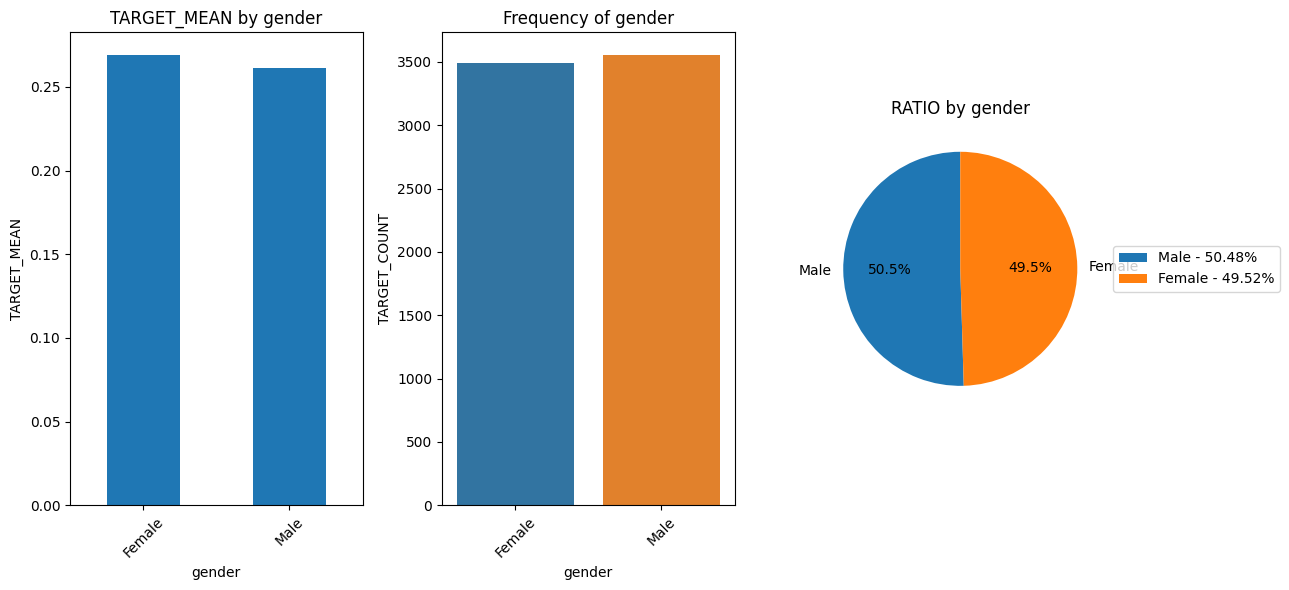

         TARGET_MEAN  TARGET_COUNT  RATIO
Partner                                  
No             0.330          3641 51.697
Yes            0.197          3402 48.303


##########################################


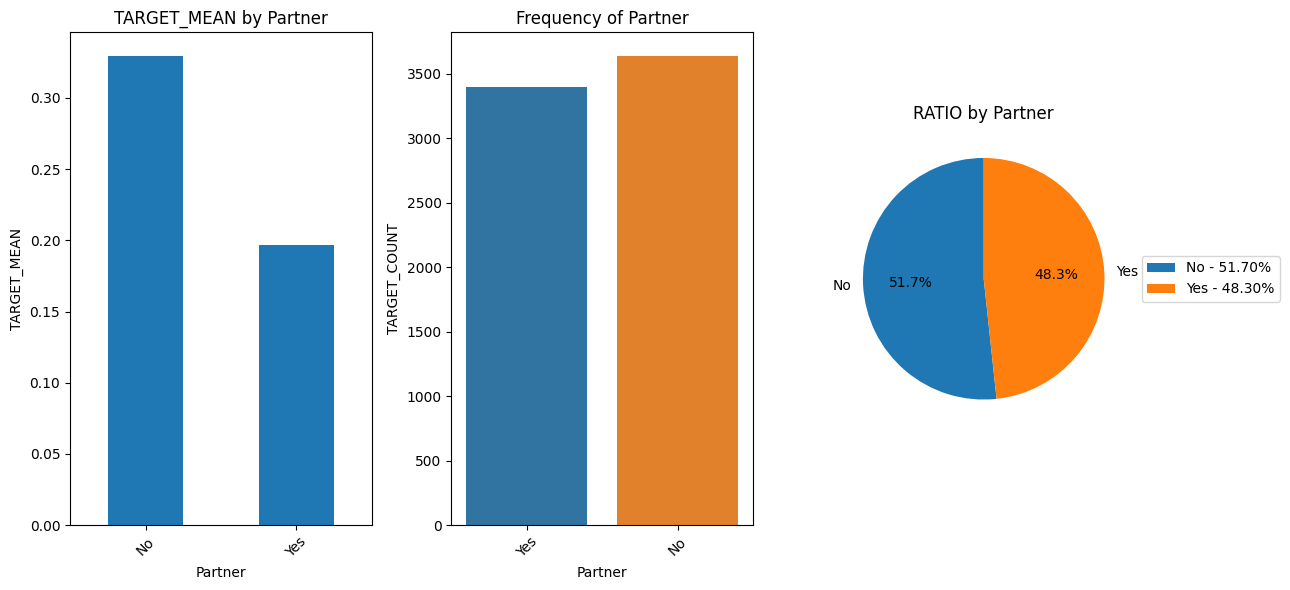

            TARGET_MEAN  TARGET_COUNT  RATIO
Dependents                                  
No                0.313          4933 70.041
Yes               0.155          2110 29.959


##########################################


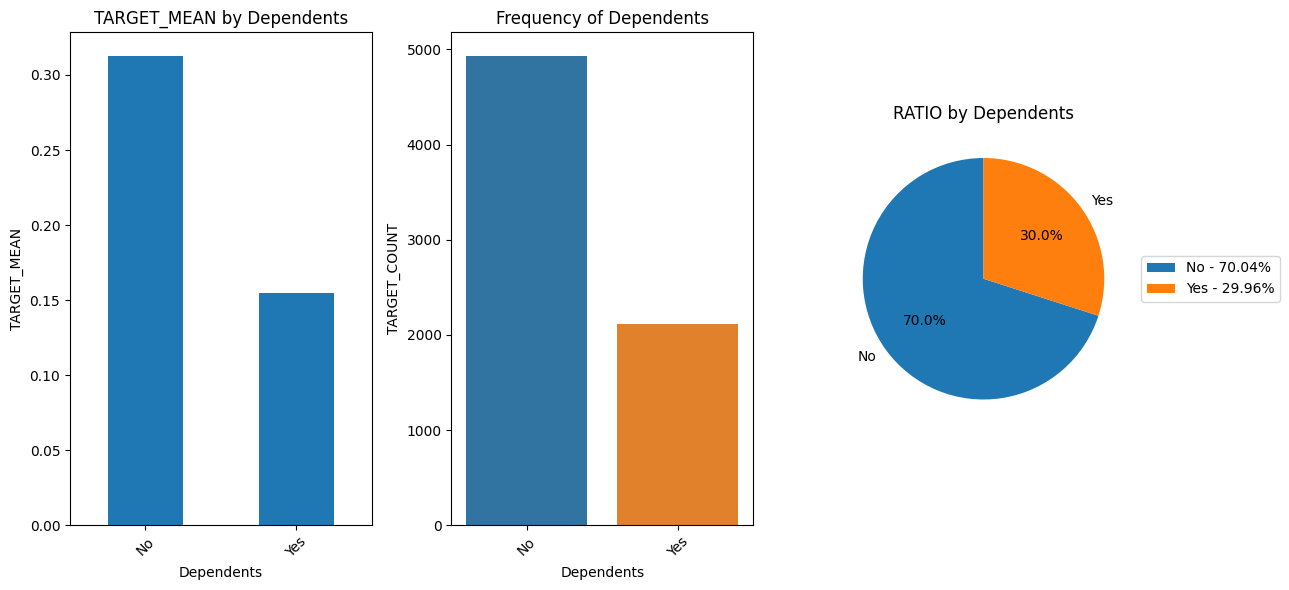

              TARGET_MEAN  TARGET_COUNT  RATIO
PhoneService                                  
No                  0.249           682  9.683
Yes                 0.267          6361 90.317


##########################################


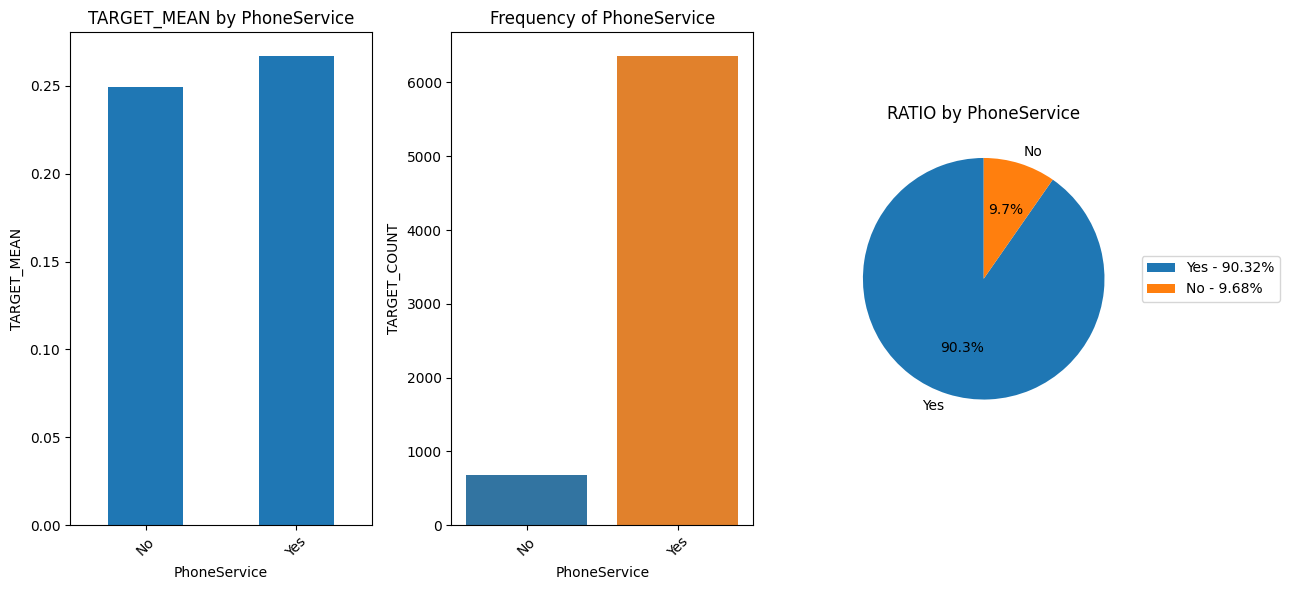

                  TARGET_MEAN  TARGET_COUNT  RATIO
MultipleLines                                     
No                      0.250          3390 48.133
No phone service        0.249           682  9.683
Yes                     0.286          2971 42.184


##########################################


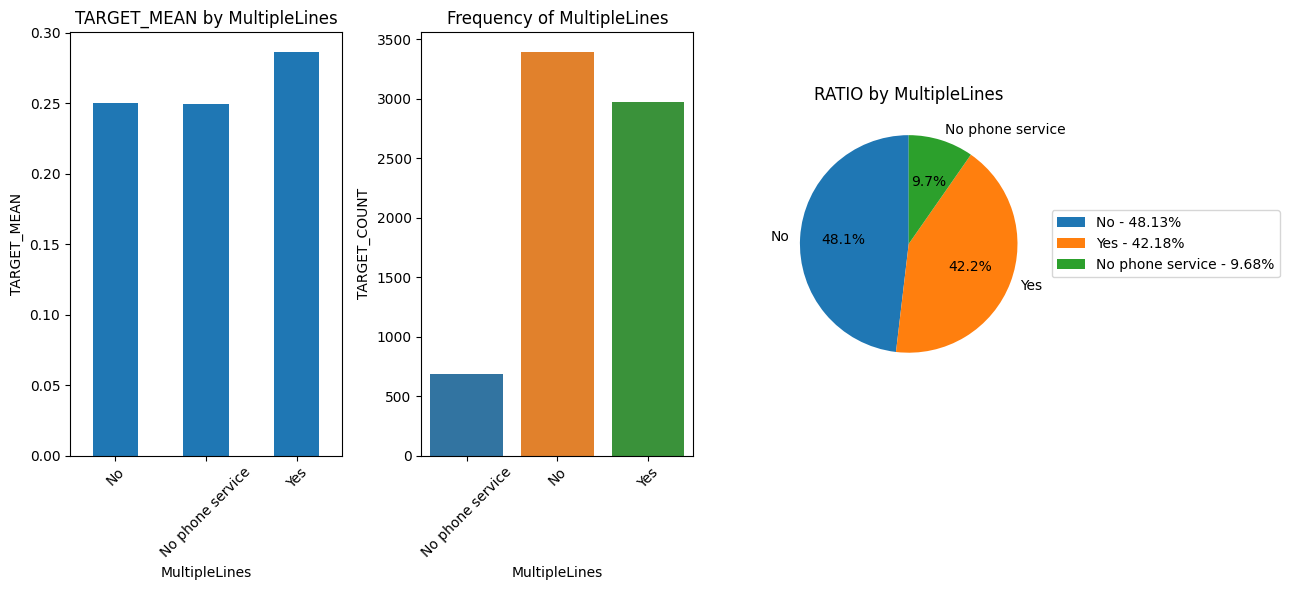

                 TARGET_MEAN  TARGET_COUNT  RATIO
InternetService                                  
DSL                    0.190          2421 34.375
Fiber optic            0.419          3096 43.959
No                     0.074          1526 21.667


##########################################


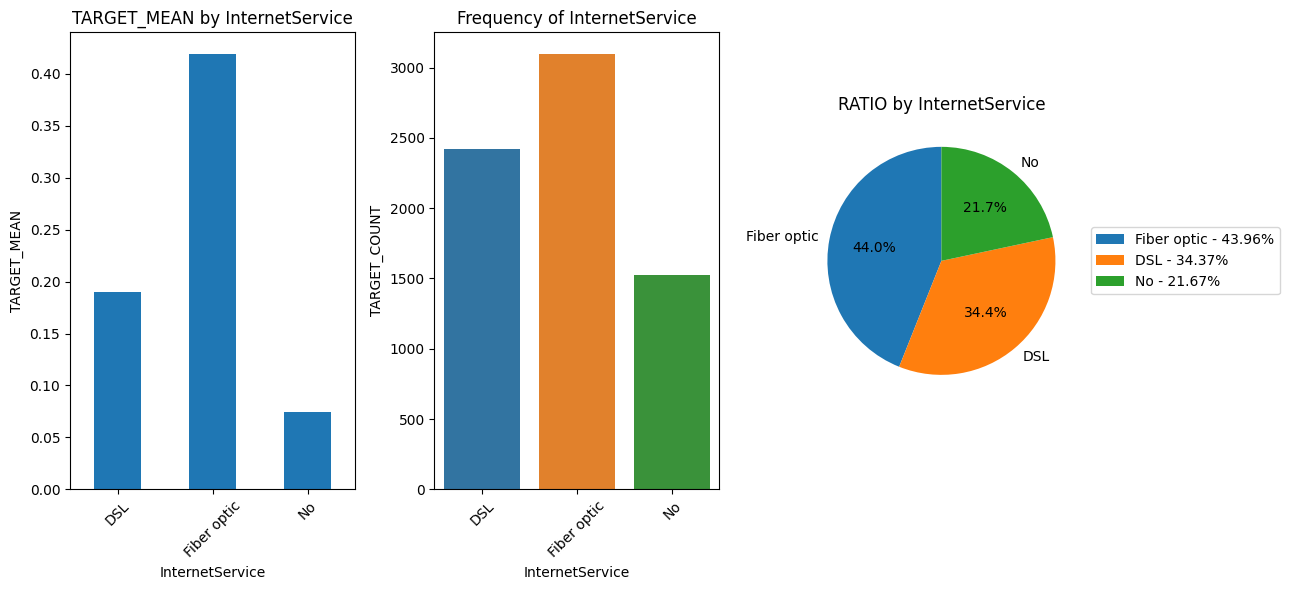

                     TARGET_MEAN  TARGET_COUNT  RATIO
OnlineSecurity                                       
No                         0.418          3498 49.666
No internet service        0.074          1526 21.667
Yes                        0.146          2019 28.667


##########################################


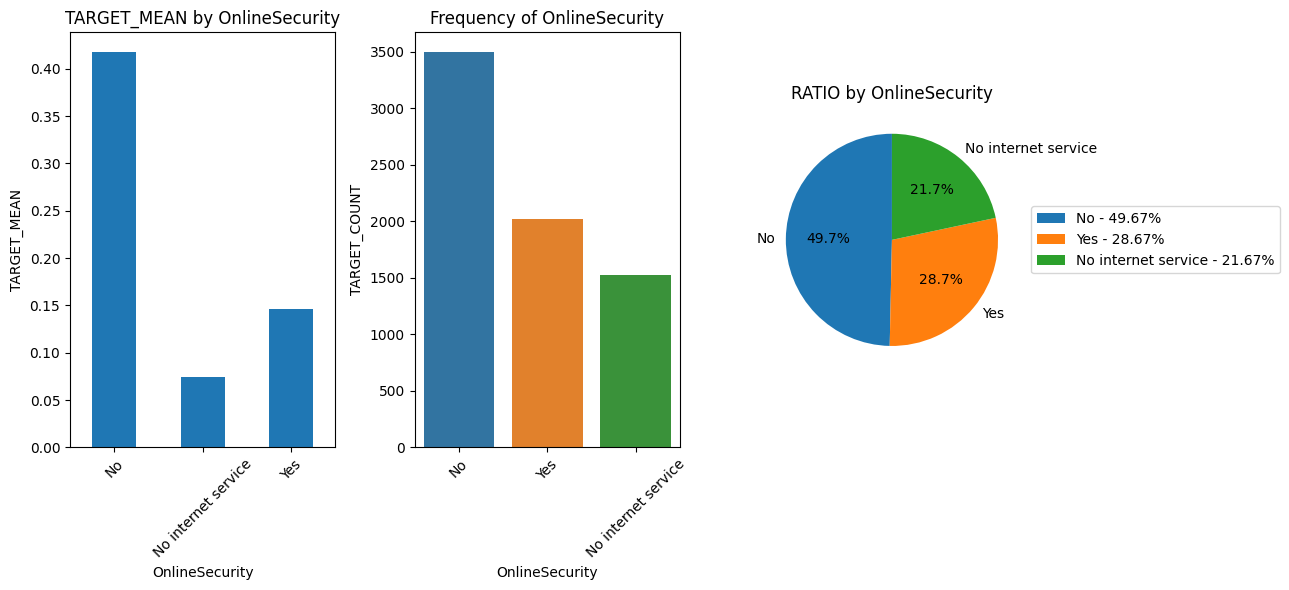

                     TARGET_MEAN  TARGET_COUNT  RATIO
OnlineBackup                                         
No                         0.399          3088 43.845
No internet service        0.074          1526 21.667
Yes                        0.215          2429 34.488


##########################################


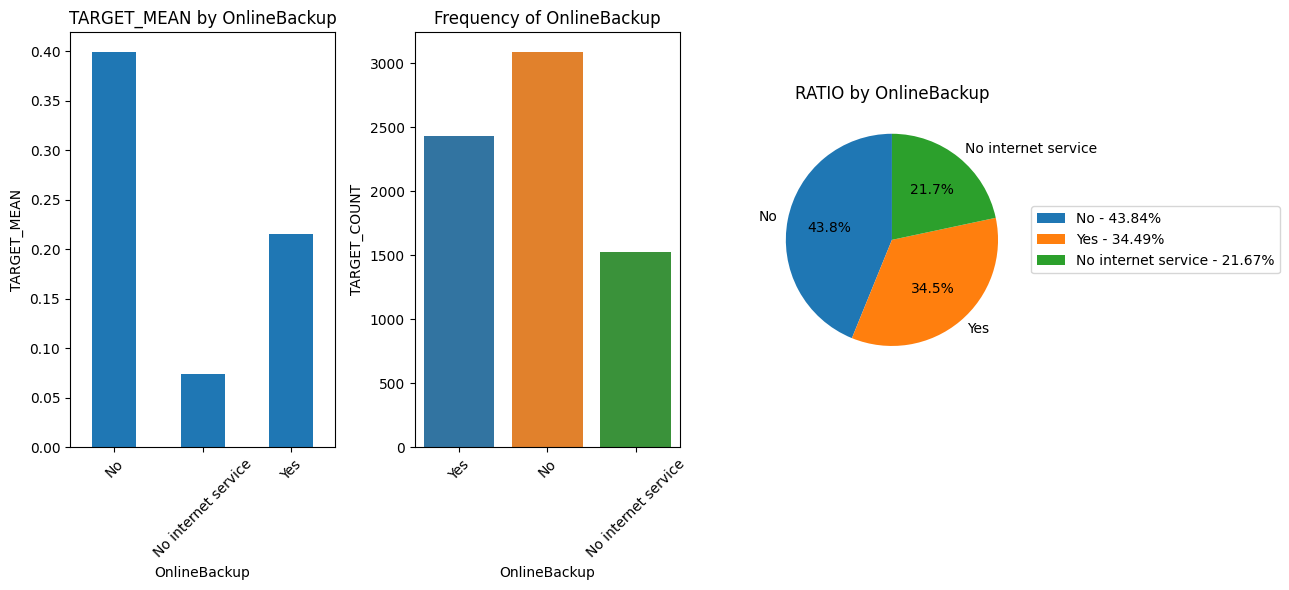

                     TARGET_MEAN  TARGET_COUNT  RATIO
DeviceProtection                                     
No                         0.391          3095 43.944
No internet service        0.074          1526 21.667
Yes                        0.225          2422 34.389


##########################################


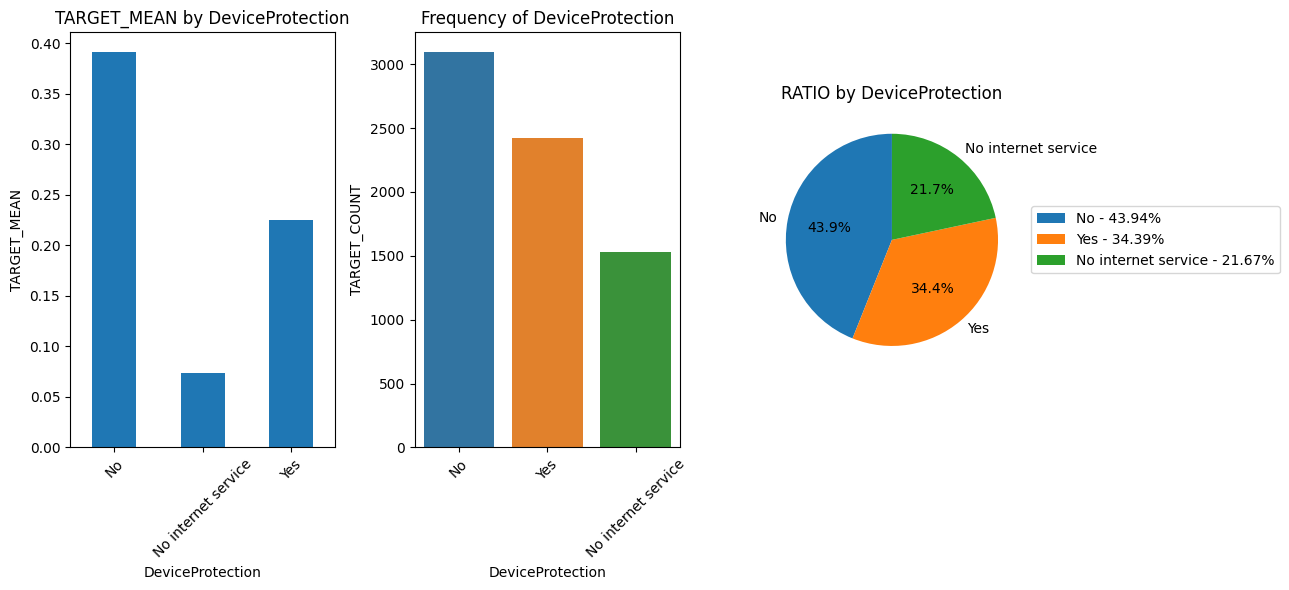

                     TARGET_MEAN  TARGET_COUNT  RATIO
TechSupport                                          
No                         0.416          3473 49.311
No internet service        0.074          1526 21.667
Yes                        0.152          2044 29.022


##########################################


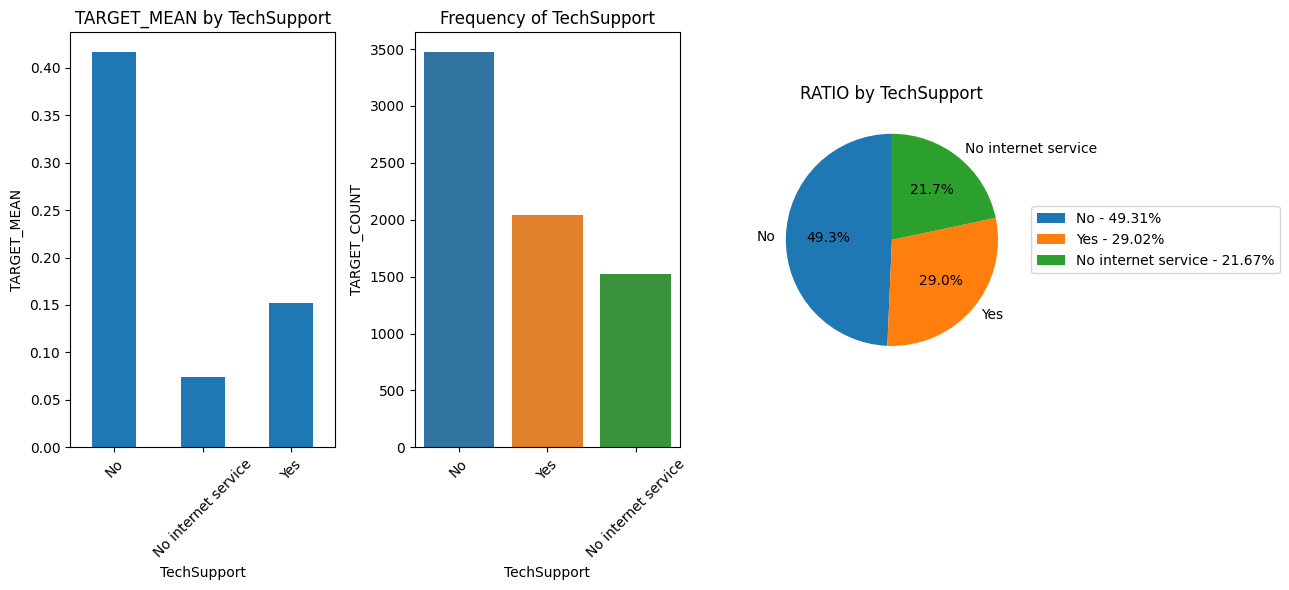

                     TARGET_MEAN  TARGET_COUNT  RATIO
StreamingTV                                          
No                         0.335          2810 39.898
No internet service        0.074          1526 21.667
Yes                        0.301          2707 38.435


##########################################


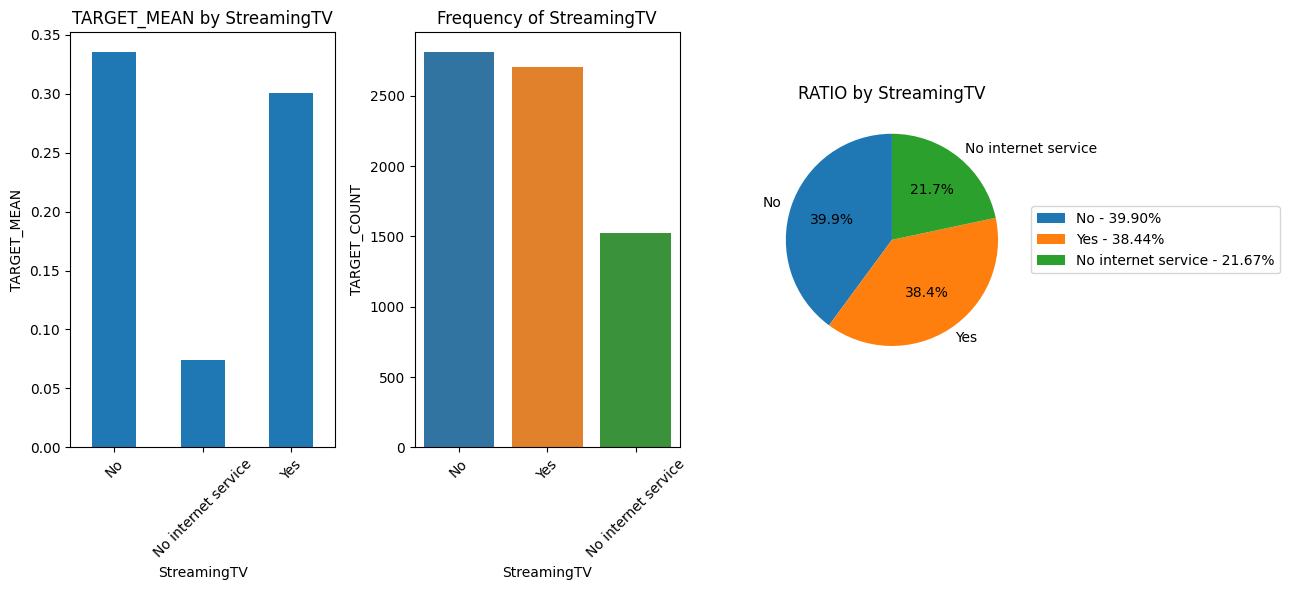

                     TARGET_MEAN  TARGET_COUNT  RATIO
StreamingMovies                                      
No                         0.337          2785 39.543
No internet service        0.074          1526 21.667
Yes                        0.299          2732 38.790


##########################################


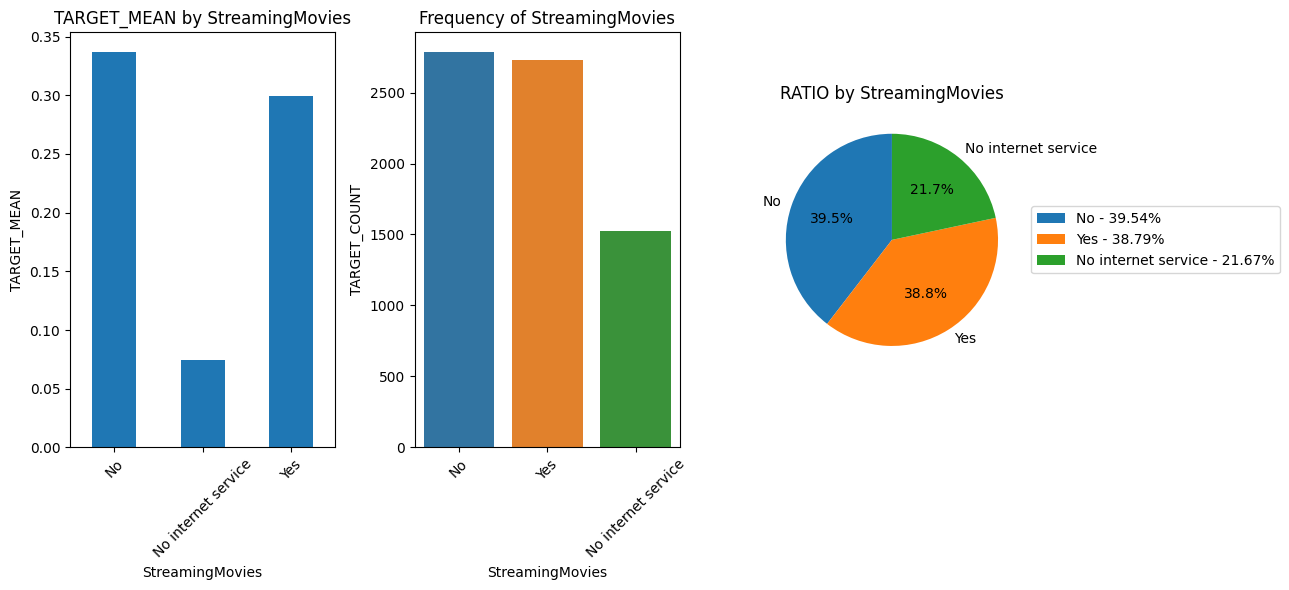

                TARGET_MEAN  TARGET_COUNT  RATIO
Contract                                        
Month-to-month        0.427          3875 55.019
One year              0.113          1473 20.914
Two year              0.028          1695 24.066


##########################################


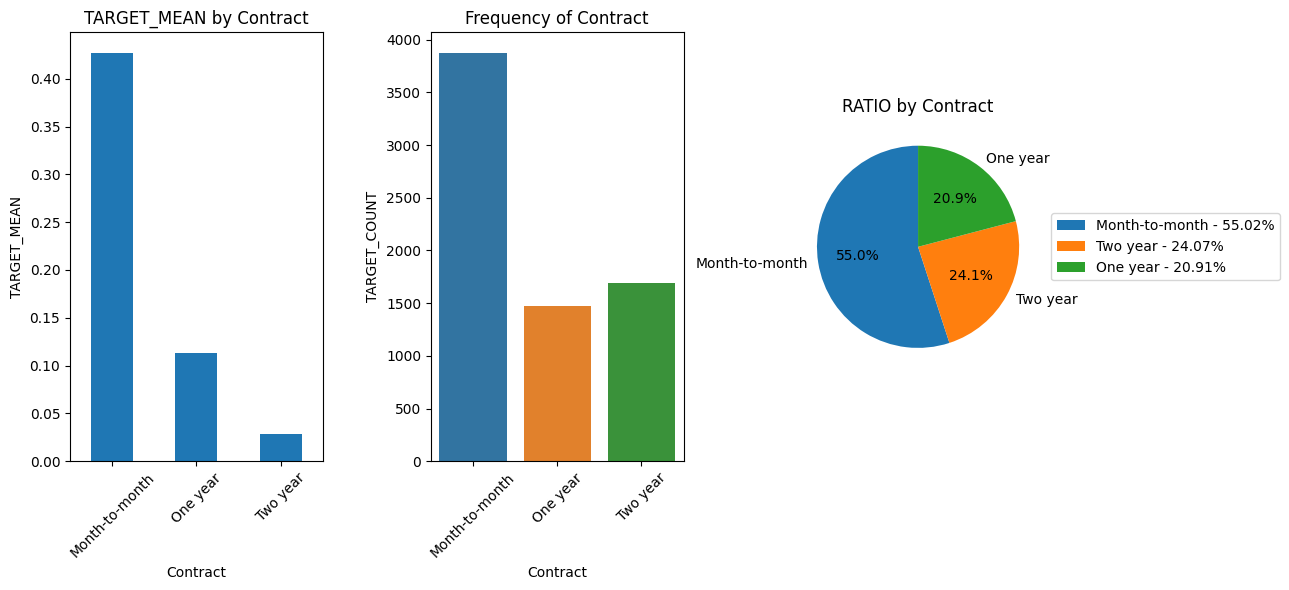

                  TARGET_MEAN  TARGET_COUNT  RATIO
PaperlessBilling                                  
No                      0.163          2872 40.778
Yes                     0.336          4171 59.222


##########################################


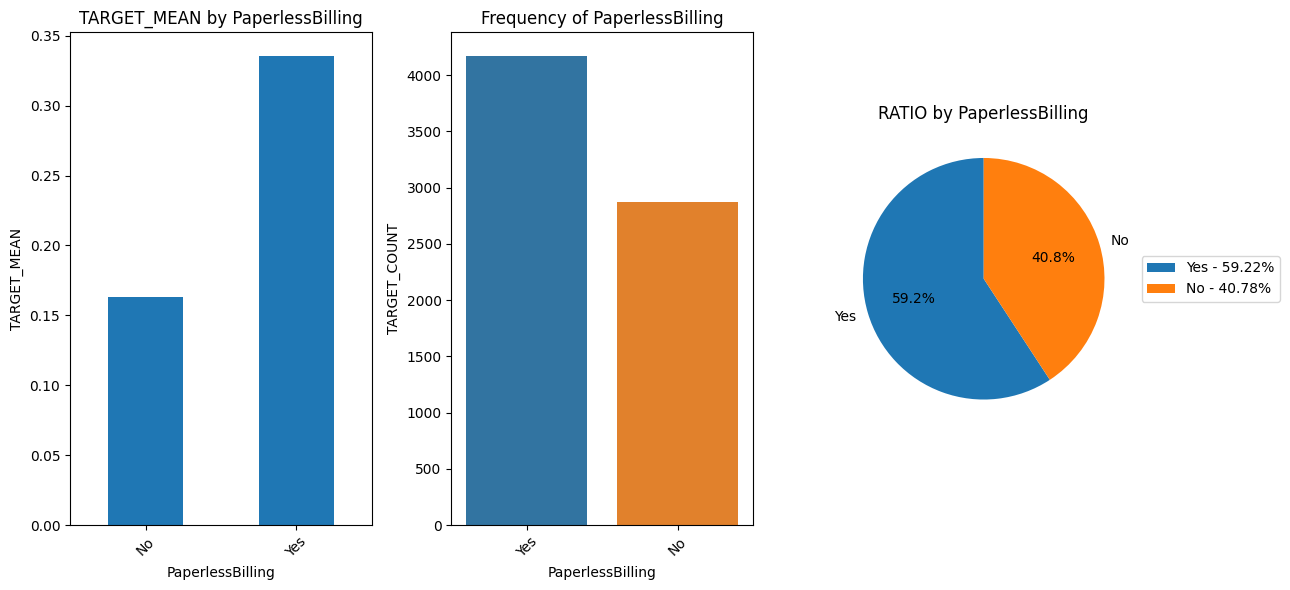

                           TARGET_MEAN  TARGET_COUNT  RATIO
PaymentMethod                                              
Bank transfer (automatic)        0.167          1544 21.922
Credit card (automatic)          0.152          1522 21.610
Electronic check                 0.453          2365 33.579
Mailed check                     0.191          1612 22.888


##########################################


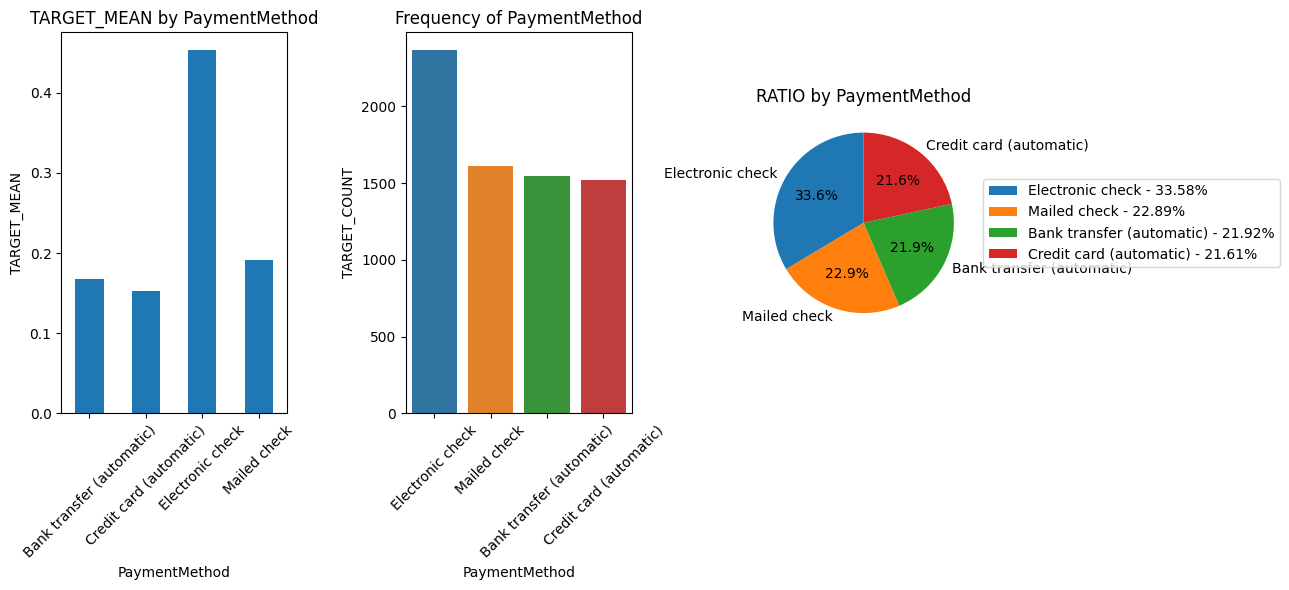

               TARGET_MEAN  TARGET_COUNT  RATIO
SeniorCitizen                                  
0                    0.236          5901 83.785
1                    0.417          1142 16.215


##########################################


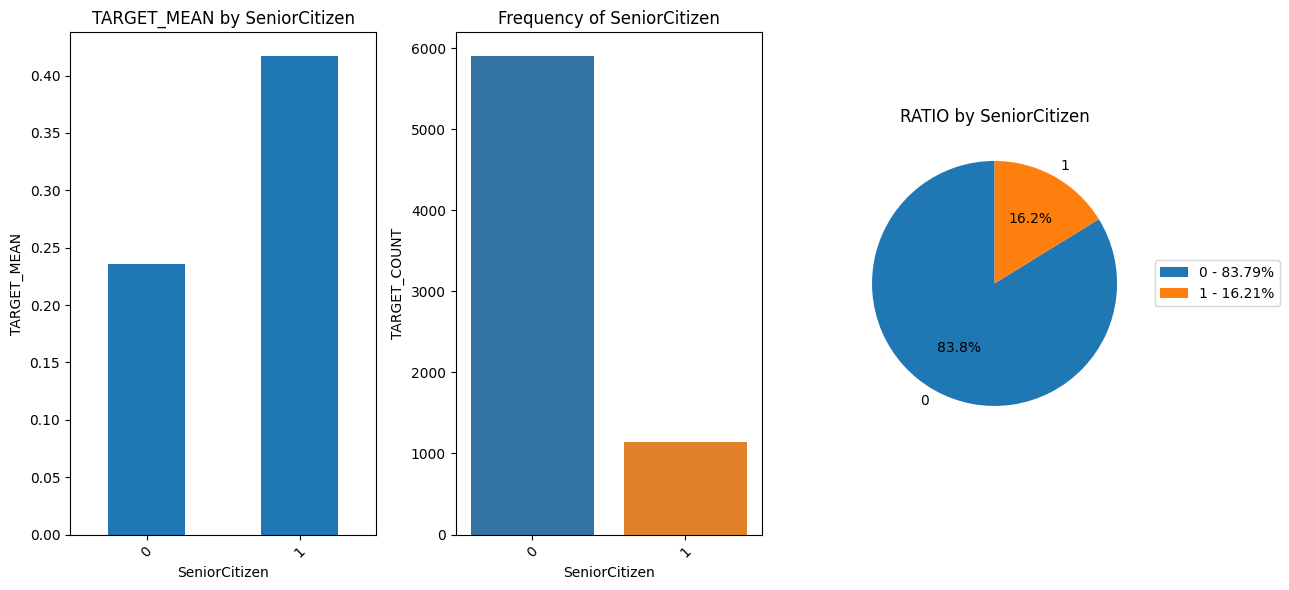

In [13]:
# Target variable anaylsis by catagorical variables
# Churn is the target variable. so remove it from cat_cols.
cat_cols = [col for col in cat_cols if "Churn" not in col]
for col in cat_cols:
    target_summary_with_cat(df, 'Churn', col, plot=True)

       tenure
Churn        
0      37.570
1      17.979
##########################################


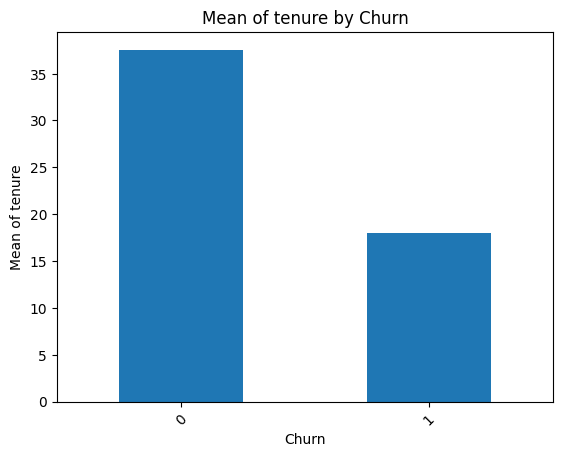

       MonthlyCharges
Churn                
0              61.265
1              74.441
##########################################


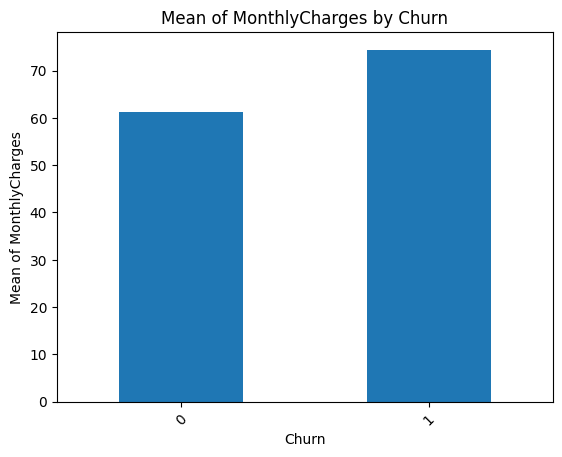

       TotalCharges
Churn              
0          2555.344
1          1531.796
##########################################


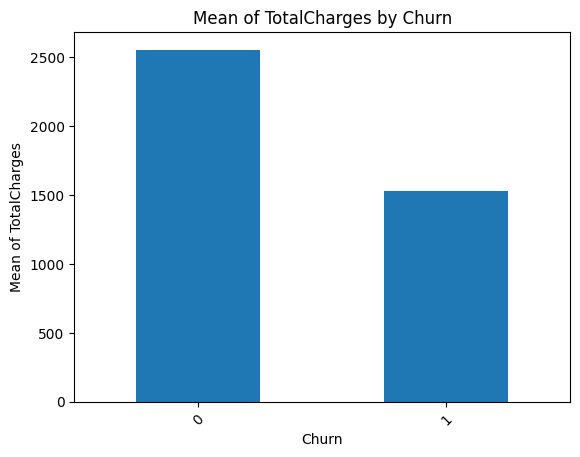

In [14]:
# Target variable anaylsis by numerical variables
for col in num_cols:
    target_summary_with_num(df,'Churn',col, plot=True)

In [15]:
# Step 5 Analyze outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

    
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [16]:
for col in num_cols:
    print(col, check_outlier(df,col))
# There are no outliers.

tenure False
MonthlyCharges False
TotalCharges False


In [17]:
# Step 6 Analyze missing values
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [18]:
missing_values_table(df)
# Only TotalCharges variable has missing values

              n_miss  ratio
TotalCharges      11  0.160


In [19]:
# Check Null Total charges with tenure and contract type
df.loc[df['TotalCharges'].isnull(),['Contract', 'tenure']]

,Contract,tenure
488,Two year,0
753,Two year,0
936,Two year,0
1082,Two year,0
1340,Two year,0
3331,Two year,0
3826,Two year,0
4380,Two year,0
5218,One year,0
6670,Two year,0


In [20]:
# All the contracts are one year or two but tenure values are 0.We can consider deleting these Null values.
df = df.dropna(subset=['TotalCharges'])

In [21]:
# Perform correlation analysis.
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    # Optionally, plot a heatmap
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (18, 13)})
        sns.heatmap(corr, cmap='magma', annot=True, fmt='.2f')
        plt.show()

    return drop_list

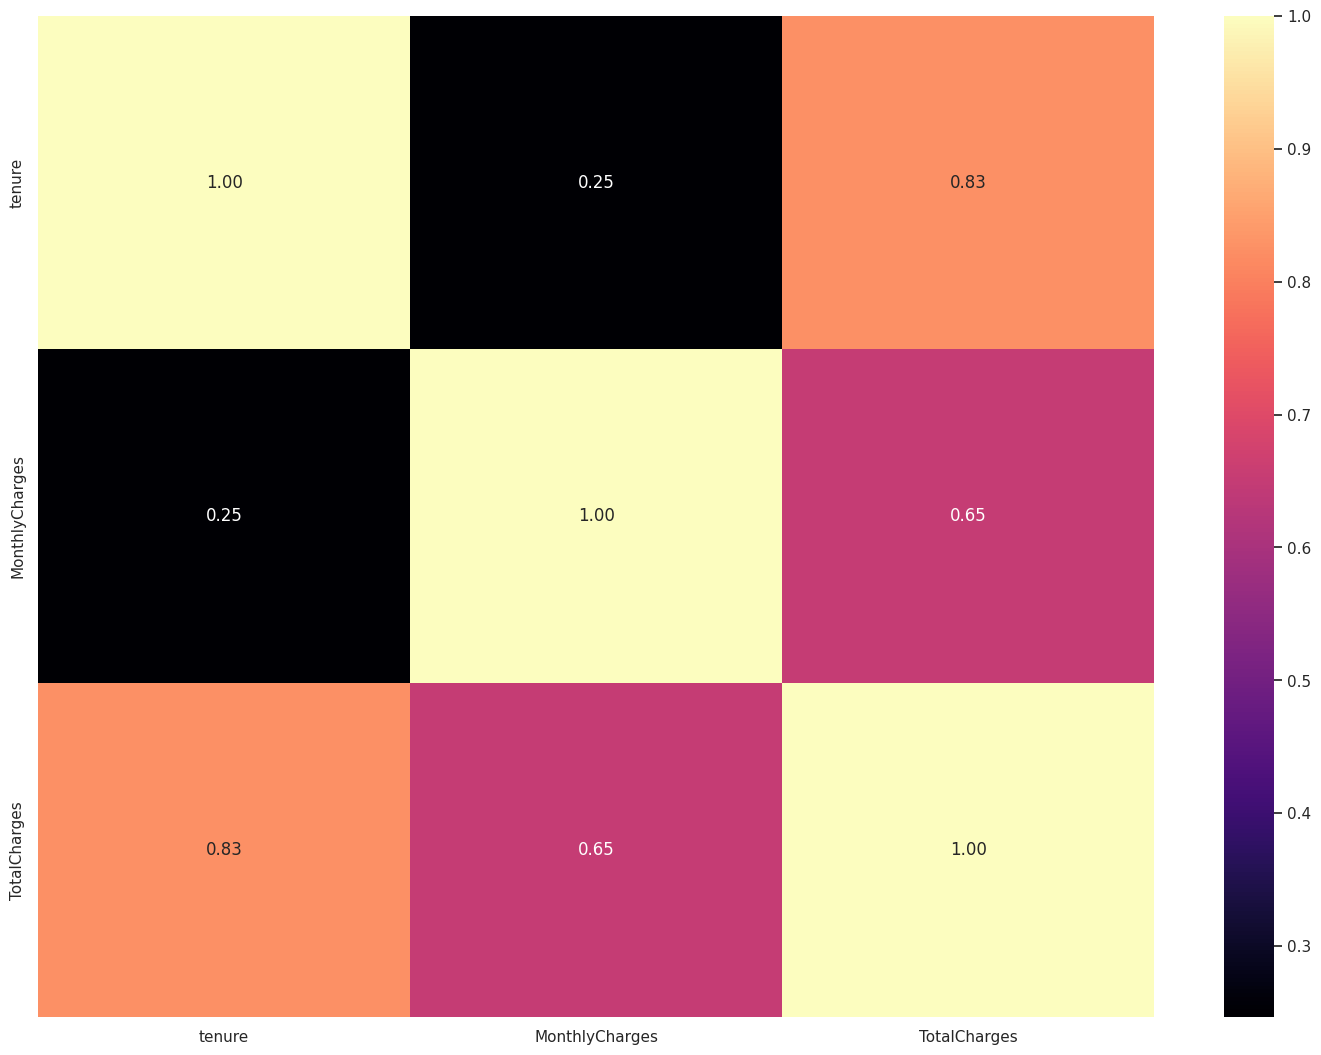

[]

In [22]:
high_correlated_cols(df[num_cols], plot=True)

<h1 style="color:#FF780F;">Base Model Setup</h1>

In [23]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ['Churn']]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

# One Hot Encoding

In [24]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [25]:
dff = one_hot_encoder(dff, cat_cols, drop_first =True)

In [26]:
dff.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,7590-VHVEG,1,29.850,29.850,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,34,56.950,1889.500,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,2,53.850,108.150,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,7795-CFOCW,45,42.300,1840.750,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,2,70.700,151.650,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [27]:
y = dff[['Churn']]
X  = dff.drop(['Churn', 'customerID'], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [29]:
# List of models to evaluate
models = [('LR', LogisticRegression(random_state=21)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=21)),
          ('RF', RandomForestClassifier(random_state=21)),
          ('SVM', SVC(gamma='auto', random_state=21)),
          ('XGB', XGBClassifier(random_state=21)),
          ("LightGBM", LGBMClassifier(random_state=21)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=21))]

In [30]:
# Train each model and evaluate its performance using cross-validation.
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8016
Auc: 0.8428
Recall: 0.5356
Precision: 0.6557
F1: 0.5891
########## KNN ##########
Accuracy: 0.7634
Auc: 0.7461
Recall: 0.4462
Precision: 0.5711
F1: 0.5005
########## CART ##########
Accuracy: 0.7285
Auc: 0.6595
Recall: 0.5083
Precision: 0.49
F1: 0.4985
########## RF ##########
Accuracy: 0.7925
Auc: 0.8258
Recall: 0.488
Precision: 0.6463
F1: 0.5559
########## SVM ##########
Accuracy: 0.7691
Auc: 0.7138
Recall: 0.2905
Precision: 0.6488
F1: 0.4008
########## XGB ##########
Accuracy: 0.786
Auc: 0.8237
Recall: 0.5179
Precision: 0.6178
F1: 0.563
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[Lig

<h1 style="color:#FF780F;">Feature Engineering:</h1>

<h5 style="color:#000000;">There are no missing values and outliers. We can start extracting new features</h5>

# Feature Extraction

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [32]:
df.loc[(df["tenure"] >= 0) & (df["tenure"] <= 12), "NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"] > 12) & (df["tenure"] <= 24), "NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"] > 24) & (df["tenure"] <= 36), "NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"] > 36) & (df["tenure"] <= 48), "NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"] > 48) & (df["tenure"] <= 60), "NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"] > 60) & (df["tenure"] <= 72), "NEW_TENURE_YEAR"] = "5-6 Year"

# Marking customers with 1 or 2-year contracts as 'Engaged' to identify potentially loyal customers.
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

# Identifying customers who do not have any of the support, backup, or protection services.
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (
        x["TechSupport"] != "Yes") else 0, axis=1)

# Identifying young, not engaged (monthly contracts) customers potentially at higher risk of churning.
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0,
                                       axis=1)

# Counting the total number of services each customer has subscribed to.
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                               'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

# Identifying customers who have subscribed to any streaming service.
df["NEW_FLAG_ANY_STREAMING"] = df.apply(
    lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Marking customers who use automatic payment methods.
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(
    lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)

# Calculating the average monthly charges.
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

# Identifying the increase in current charges compared to the average charges.
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Calculating the average service fee per subscribed service.
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,1,0,0,14.925,0.500,14.925
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,1,0,0,50.550,0.715,35.350


# ENCODING

In [34]:
# Separate variables by type
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


In [35]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


In [36]:
binary_cols = [col for col in df.columns if df[col].dtypes == 'O' and df[col].nunique() == 2]
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [37]:
for col in binary_cols:
    label_encoder(df, col)

# ONE-HOT ENCODING

In [38]:
# update cat cols
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TOTAL_SERVICES", "NEW_TOTAL_ONLINE_SERVICES"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_TotalServices',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [39]:
# define one hpt encoder function
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [40]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

<h1 style="color:#FF780F;">Model:</h1>

In [41]:
# Define the target variable 'y' and feature set 'X'.
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)  # Drop 'customerID' as it's not a feature.

In [42]:
# Define a list of models to evaluate.
models = [
    ('LR', LogisticRegression(random_state=42, max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(gamma='auto', random_state=42)),
    ('XGB', XGBClassifier(random_state=425)),
    ("LightGBM", LGBMClassifier(verbose=-1,random_state=42)),
    ("CatBoost", CatBoostClassifier(verbose=False, random_state=42))
]

In [43]:
# Loop through models to train and evaluate them using cross-validation.
# Scoring metrics include accuracy, F1 score, ROC AUC, precision, and recall.
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8053
Auc: 0.8473
Recall: 0.5297
Precision: 0.6698
F1: 0.5909
########## KNN ##########
Accuracy: 0.7699
Auc: 0.7533
Recall: 0.4639
Precision: 0.586
F1: 0.5169
########## CART ##########
Accuracy: 0.7271
Auc: 0.6583
Recall: 0.5072
Precision: 0.4879
F1: 0.4971
########## RF ##########
Accuracy: 0.7891
Auc: 0.8259
Recall: 0.4928
Precision: 0.6333
F1: 0.5539
########## SVM ##########
Accuracy: 0.7671
Auc: 0.7274
Recall: 0.2681
Precision: 0.6511
F1: 0.3791
########## XGB ##########
Accuracy: 0.7902
Auc: 0.8249
Recall: 0.5222
Precision: 0.6278
F1: 0.5697
########## LightGBM ##########
Accuracy: 0.7966
Auc: 0.8369
Recall: 0.5238
Precision: 0.6448
F1: 0.5778
########## CatBoost ##########
Accuracy: 0.7969
Auc: 0.8405
Recall: 0.5163
Precision: 0.6491
F1: 0.5749


# Random Forest Hyperparameter Tuning

In [44]:
# Initialize a Random Forest classifier.
rf_model = RandomForestClassifier(random_state=21)

In [45]:

# Define the parameter grid for Random Forests.
rf_params = {
    "max_depth": [5, 8, None],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 8],
    "n_estimators": [100, 200]
}

In [46]:
# Perform grid search with cross-validation to find the best parameters.
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [47]:
# Output the best parameters and the best score achieved.
print(rf_best_grid.best_params_) #{'max_depth': 8, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 100}

print(rf_best_grid.best_score_) #0.0.7993431541742618

{'max_depth': 8, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 200}
0.7993431541742618


In [48]:
# Train the final model with the best parameters.
rf_final: object = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

In [49]:
# Evaluate the final model using cross-validation.
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print(f"Random Forests Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Random Forests F1: {cv_results['test_f1'].mean()}")
print(f"Random Forests ROC AUC: {cv_results['test_roc_auc'].mean()}")

Random Forests Accuracy: 0.7976353371912583
Random Forests F1: 0.5642482859482619
Random Forests ROC AUC: 0.8446596610661887


# XGBoost Hyperparameter Tuning

In [50]:
# Initialize an XGBoost classifier.
xgboost_model = XGBClassifier(random_state=42)

In [51]:
# Define the parameter grid for XGBoost.
xgboost_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5,12, 20],
    "n_estimators": [100, 500],
    "colsample_bytree": [0.7, 1]
}

In [52]:
# Perform grid search with cross-validation to find the best parameters.
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=3, n_jobs=-1, verbose=True).fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [53]:
# Train the final model with the best parameters.
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

In [54]:
# Evaluate the final model using cross-validation.
cv_results = cross_validate(xgboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print(f"XGBoost Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"XGBoost F1: {cv_results['test_f1'].mean()}")
print(f"XGBoost ROC AUC: {cv_results['test_roc_auc'].mean()}")

XGBoost Accuracy: 0.7997704022055946
XGBoost F1: 0.583345160762109
XGBoost ROC AUC: 0.8425116615006472


# LightGBM Hyperparameter Tuning

In [55]:
# Initialize a LightGBM classifier.
lgbm_model = LGBMClassifier(verbose =-1,random_state=17)

In [56]:
# Define the parameter grid for LightGBM.
lgbm_params = {
    "learning_rate": [0.1, 0.001],
    "n_estimators": [100, 500, 1000],
    "colsample_bytree": [0.7, 1]
}

In [57]:
# Perform grid search with cross-validation to find the best parameters.
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [58]:
# Train the final model with the best parameters.
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [59]:
# Evaluate the final model using cross-validation.
cv_results = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print(f"LightGBM Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"LightGBM F1: {cv_results['test_f1'].mean()}")
print(f"LightGBM ROC AUC: {cv_results['test_roc_auc'].mean()}")


LightGBM Accuracy: 0.7966452621880253
LightGBM F1: 0.5778468231117352
LightGBM ROC AUC: 0.8368541005352395


# CatBoost Optimization

In [60]:
# Initialize the CatBoost classifier with specific random state for reproducibility and silent mode to reduce log noise.
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [61]:
# Define the hyperparameter grid for the CatBoost model.
catboost_params = {
    "iterations": [200, 500],  # Number of trees
    "learning_rate": [0.05, 0.1],  # Step size for tree's weight adjustment
    "depth": [3, 6]  # Depth of trees
}


In [62]:
# Perform grid search to find the best hyperparameters within the defined grid, using cross-validation.
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [63]:
# Apply the best hyperparameters to the CatBoost model.
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

In [64]:
# Evaluate the optimized CatBoost model using cross-validation and several metrics.
cv_results = cross_validate(catboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [65]:
# Print out the average scores from cross-validation to assess model performance.
print(f"CatBoost Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"CatBoost F1 Score: {cv_results['test_f1'].mean()}")
print(f"CatBoost ROC AUC: {cv_results['test_roc_auc'].mean()}")

CatBoost Accuracy: 0.8036119552566922
CatBoost F1 Score: 0.5836547810666151
CatBoost ROC AUC: 0.8454207783242162


# Feature Importance Analysis

In [66]:
# Function to plot the importance of features for the given model.
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

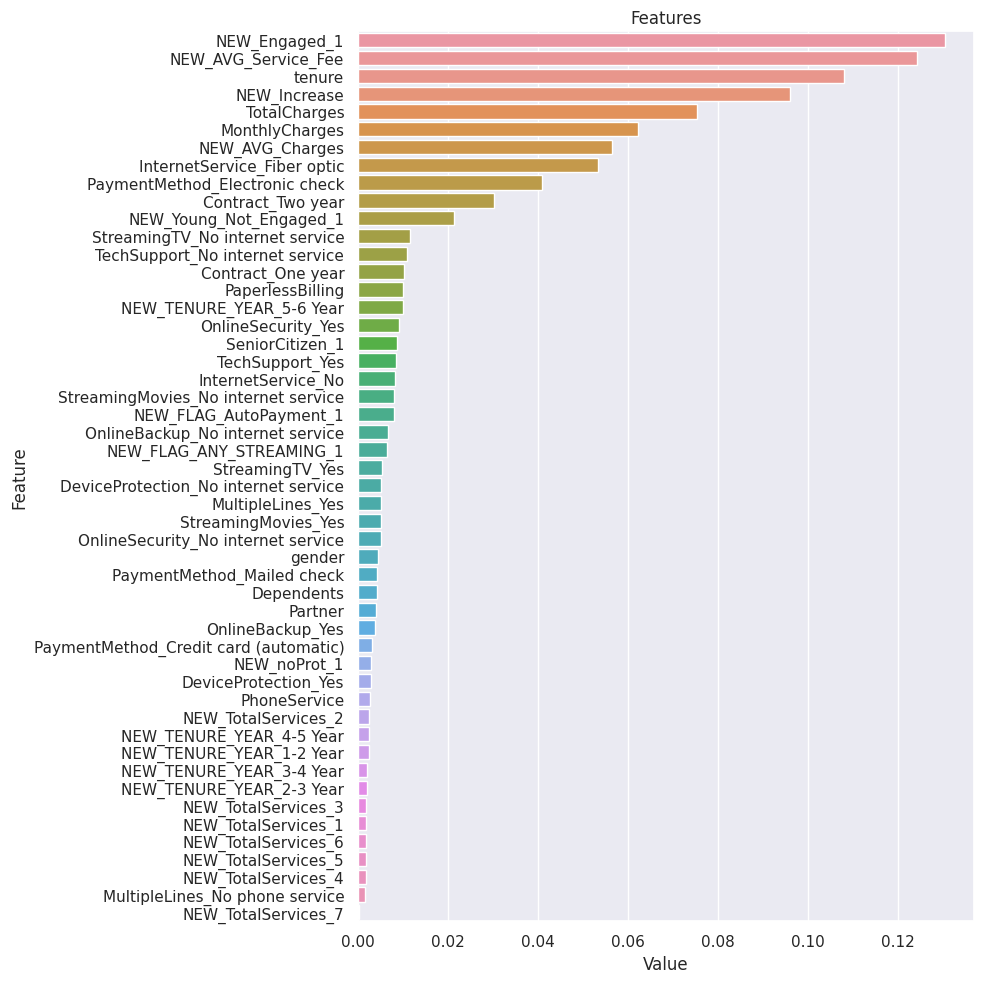

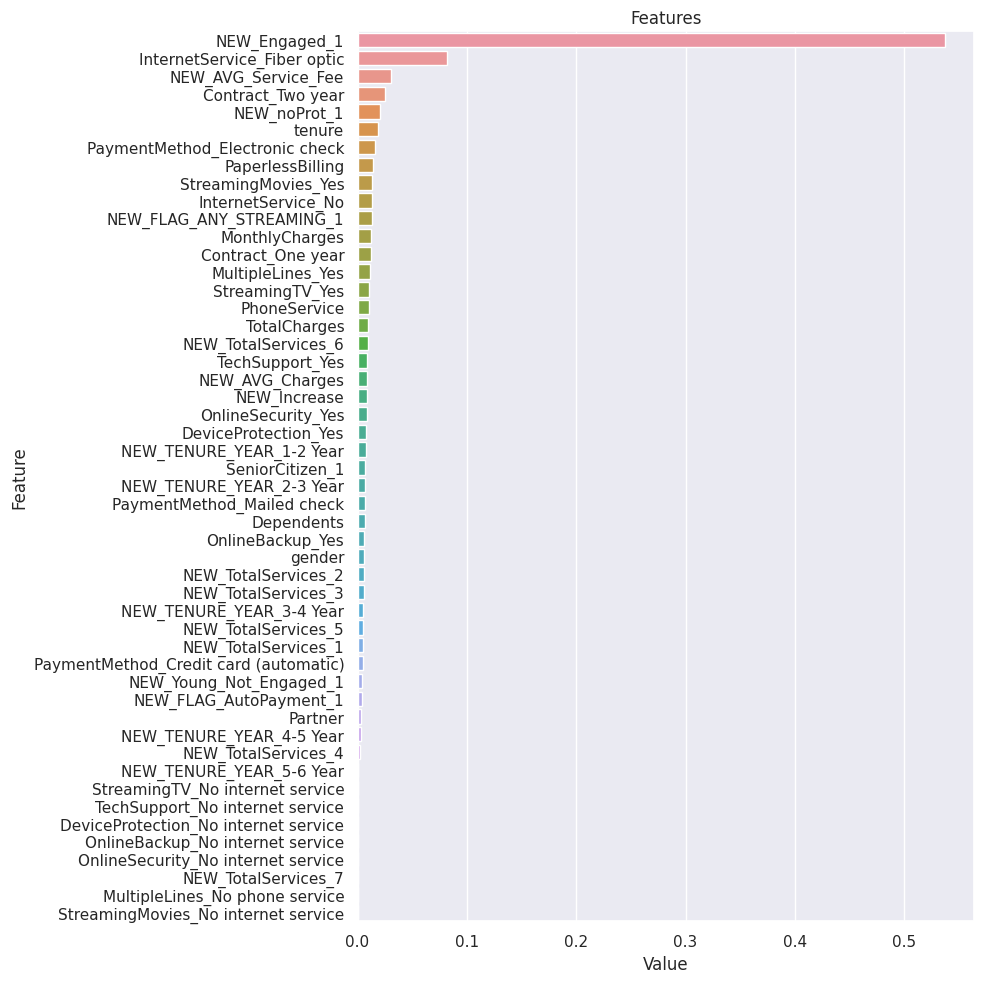

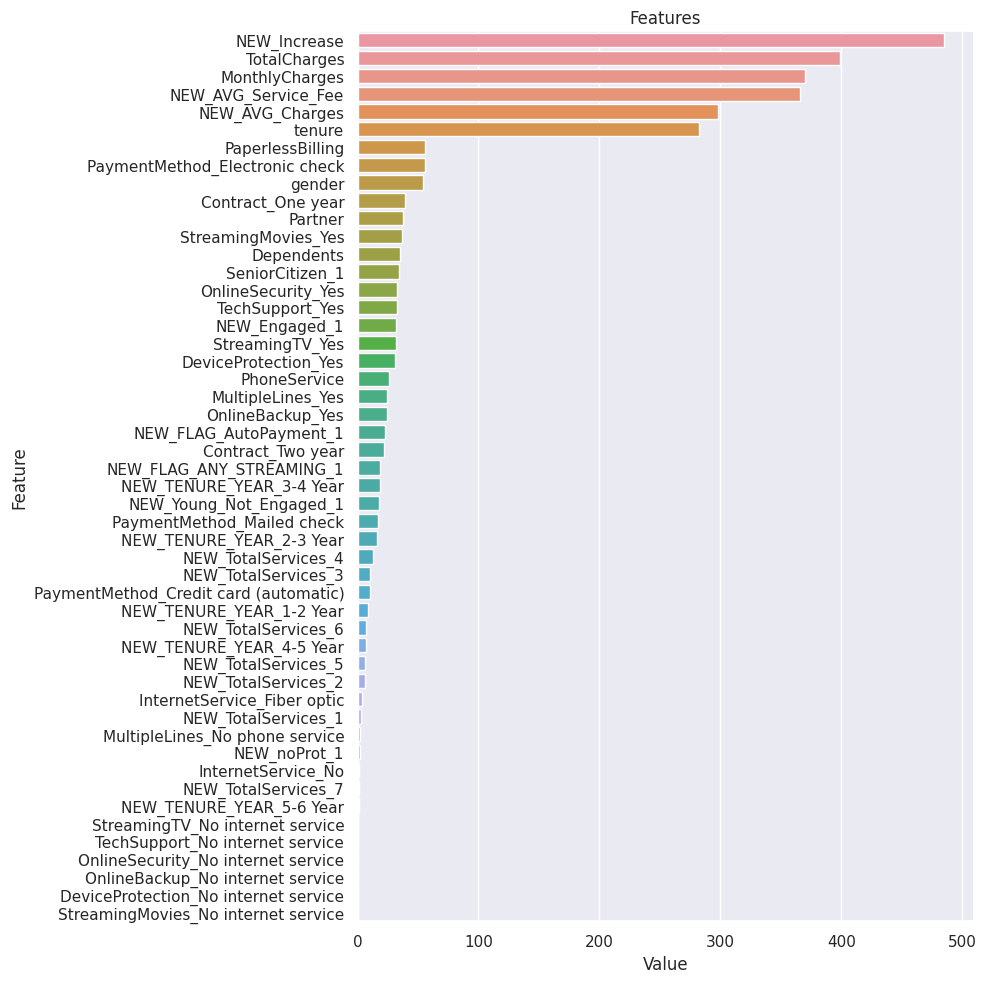

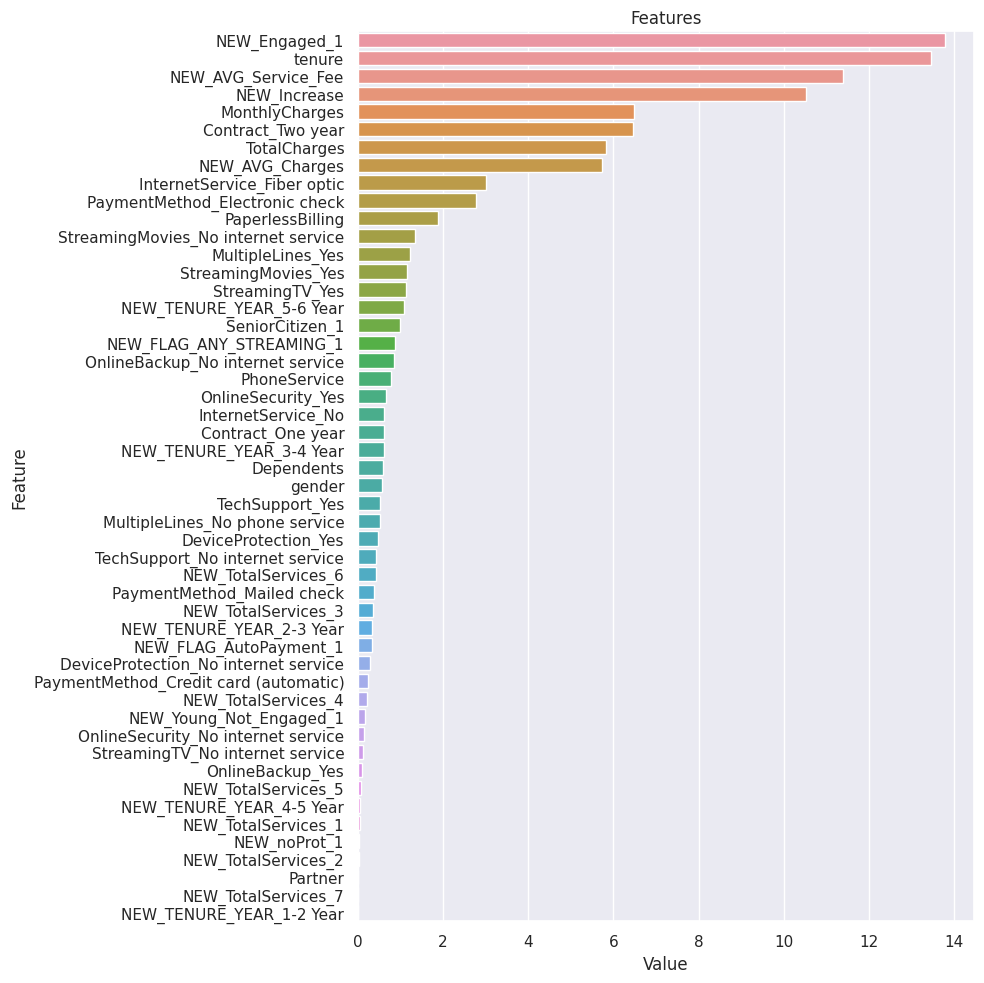

In [67]:
# Plot feature importance for all final models to understand which features are most influential in predicting churn.
plot_importance(rf_final, X)
plot_importance(xgboost_final, X)
plot_importance(lgbm_final, X)
plot_importance(catboost_final, X)